In [1]:
import numpy as np
from dvr2d import *
from utils import *
import matplotlib.pyplot as plt

from qiskit import Aer
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP, BOBYQA, NELDER_MEAD, SNOBFIT
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.quantum_info.operators import Operator
from qiskit.opflow import PrimitiveOp
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 300

%load_ext autoreload

ModuleNotFoundError: No module named 'dvr2d'

In [ ]:
r = []
costheta = []
v = []
with open('arhcl.txt', 'r') as f:
# with open('h63.txt', 'r') as f:
    lines = f.readlines()
    for l in lines:
        r.append(float(l[:22]))
        costheta.append(float(l[22:53]))
        v.append(float(l[53:-1]))

r = np.array(r)
costheta = np.array(costheta)
theta = np.arccos(costheta)
v = np.array(v)
print(v.shape)
# print(theta)
print(np.unique(r))
print(np.unique(theta))
print(np.unique(r)[130])
print(v)

(202101,)
[ 3.      3.0065  3.013  ... 15.987  15.9935 16.    ]
[0.         0.20033484 0.28379411 0.34816602 0.40271584 0.45102681
 0.49493413 0.53552665 0.5735131  0.60938531 0.64350111 0.67613051
 0.70748321 0.73772597 0.76699401 0.79539883 0.82303369 0.84997757
 0.87629806 0.90205362 0.92729522 0.95206764 0.97641053 1.00035922
 1.02394538 1.04719755 1.07014161 1.09280113 1.11519765 1.13735101
 1.15927948 1.18100003 1.20252843 1.22387943 1.24506684 1.26610367
 1.28700222 1.30777412 1.32843048 1.34898186 1.36943841 1.38980988
 1.41010567 1.43033491 1.45050644 1.47062891 1.49071075 1.51076027
 1.53078565 1.55079499 1.57079633 1.59079766 1.610807   1.63083239
 1.65088191 1.67096375 1.69108621 1.71125774 1.73148698 1.75178278
 1.77215425 1.7926108  1.81316218 1.83381853 1.85459044 1.87548898
 1.89652581 1.91771322 1.93906422 1.96059262 1.98231317 2.00424165
 2.026395   2.04879153 2.07145104 2.0943951  2.11764728 2.14123344
 2.16518213 2.18952502 2.21429744 2.23953903 2.26529459 2.2916150

In [ ]:
%autoreload
pot2d = interp_pot2d(r, costheta, v)

(202101, 2)


In [4]:
%autoreload
N_R = 35
N_theta = 4
l = 1
K_max = 0
r_min = 3.4
r_max = 5

Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
Rs_angs = Rs_DVR * arhcl_params['S'] * au_to_angs
print(Rs_angs)
print(Rs_angs.shape)
N_R_lim = Rs_angs.shape[0]

h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0) * hartree
print(h_dvr.shape)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[0], eigvecs.T[0])
# plt.bar(range(eigvecs.shape[1]), eigvecs.T[0])

[3.46947645 3.56275227 3.68968871 3.85075902 4.04631668 4.27674887
 4.54250574 4.84411195]
(8,)
(32, 32)
-115.17796582356051 [-0.00683351 -0.02164301  0.04891693 -0.07313988 -0.06500382  0.03045261
 -0.00734389 -0.00074949  0.00666572  0.02471542 -0.06923657  0.12880097
  0.1354306  -0.07065164  0.01735824  0.00191214 -0.0117643  -0.0467119
  0.14459053 -0.2985574  -0.33356633  0.17389686 -0.03957321 -0.00418698
  0.00965996  0.04875594 -0.192528    0.47619306  0.57331354 -0.2943692
  0.06105518  0.00618515]


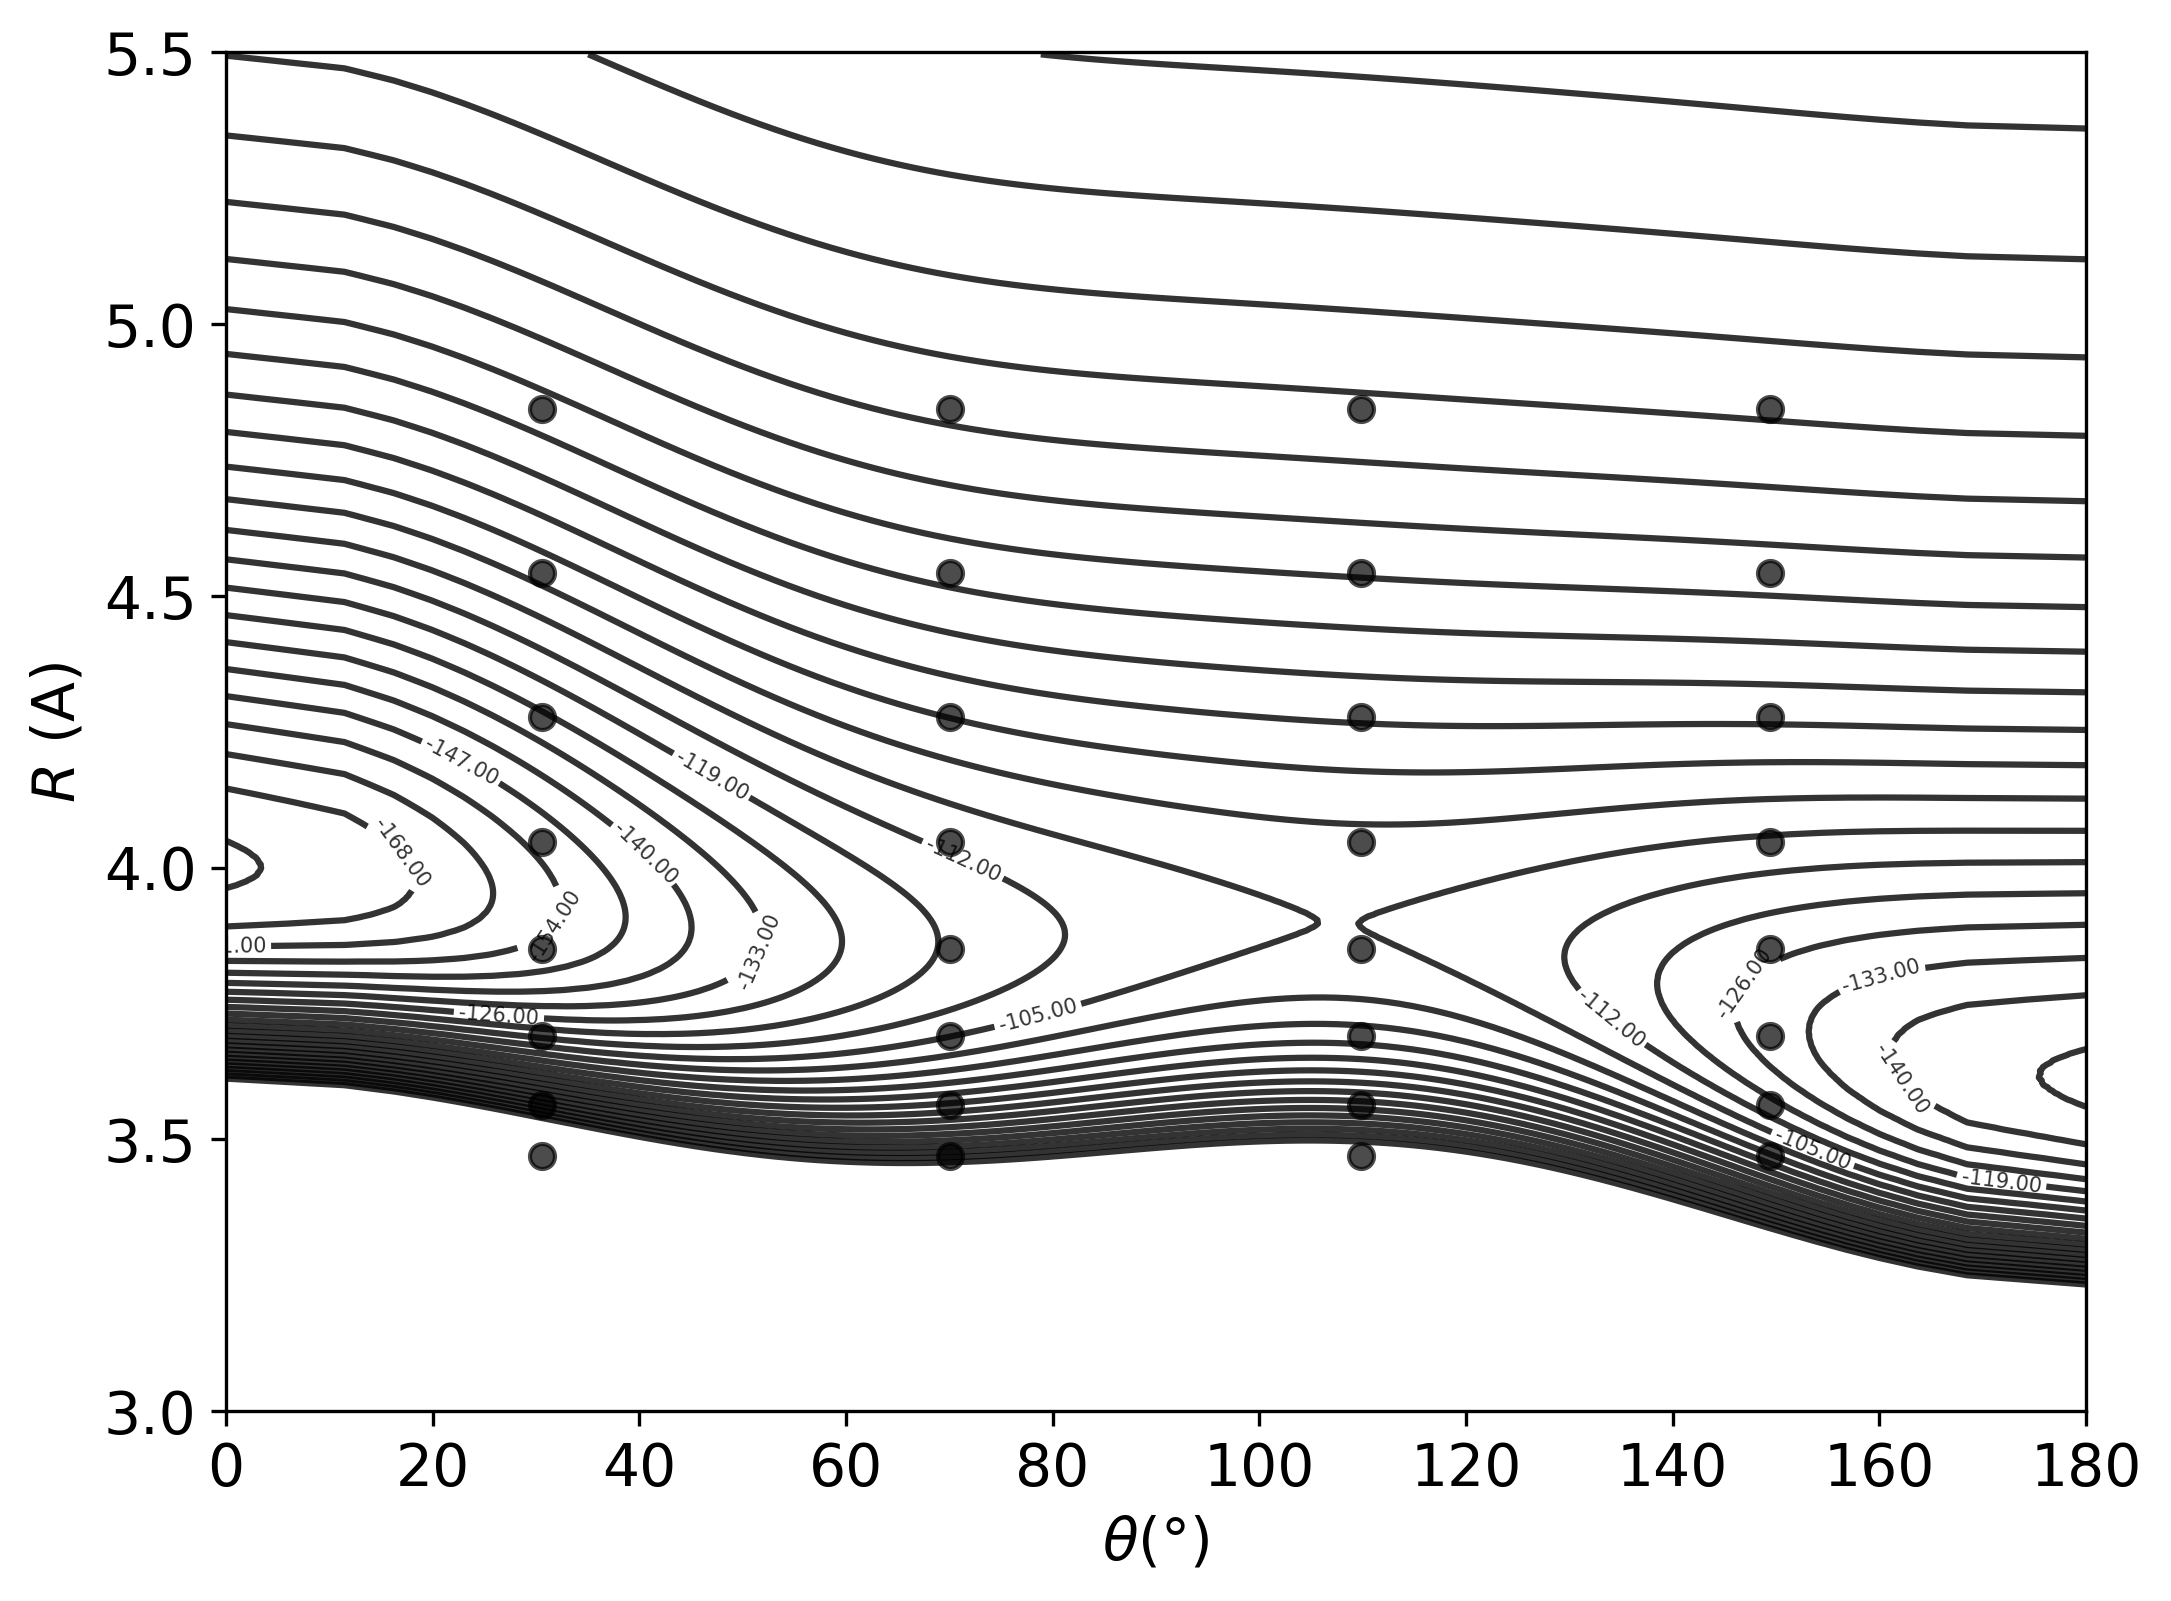

In [5]:
cmap = plt.get_cmap('tab10')
theta_p, r_p, v_p = theta[v < 0], r[v < 0], v[v < 0]
coef = 180 / np.pi

p = plt.tricontour(theta_p[r_p < 5.5] * coef, r_p[r_p < 5.5], v_p[r_p < 5.5], levels=np.linspace(-175, 0, 26), colors='black', linestyles='solid', alpha=0.8)
# plt.plot(theta[ind_min1], r[ind_min1], 'x', c='black')
# plt.plot(theta[ind_min2], r[ind_min2], 'x', c='black')
# plt.plot(1.8754889808102941, 3.897, 'o', c='black')
Rs_grid, Xs_grid = np.meshgrid(Rs_DVR * arhcl_params['S'] * au_to_angs, np.arccos(Xs_K[0]))
Rs_grid, Xs_grid = Rs_grid.flatten(), Xs_grid.flatten()

labels = p.levels[:-15:]
plt.clabel(p, inline=1, fontsize=5, levels=labels, fmt='%.2f', use_clabeltext=True)
plt.ylim()
plt.xlabel('$\\theta (\degree)$')
plt.ylabel('$R$ (A)')
plt.ylim((3, 5.5))
# plt.xlim((0, np.pi))

# offset = 0.05
# plt.bar(np.arccos(Xs_K[0]), eigvecs5.T[0][::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 1 * offset, eigvecs5.T[0][1::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 2 * offset, eigvecs5.T[0][2::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 3 * offset, eigvecs5.T[0][3::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 4 * offset, eigvecs5.T[0][4::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.axhline(4.0, linestyle='dashed', c='black', linewidth=0.2)


for i in range(N_theta):
    evec = eigvecs.T[0][i * N_R_lim:(i+1) * N_R_lim]
    epos = np.where(evec >=0, evec, 0)
    eneg = np.where(evec <0, -evec, 0)
    plt.scatter(np.repeat(np.arccos(Xs_K[0][i]) * coef, N_R_lim), Rs_DVR * arhcl_params['S'] * au_to_angs, marker='o', c='black', zorder=20, alpha=0.7)
    # plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * arhcl_params['S'] * au_to_angs, marker='o', facecolors='black', edgecolors='black', s=epos * 400, zorder=20, alpha=0.7)
    # plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * arhcl_params['S'] * au_to_angs, facecolors='none', edgecolors='black', s=eneg * 400, alpha=0.7, zorder=20)

In [6]:
h_dvr_pauli = pauli_decompose(h_dvr)

np.allclose(h_dvr, h_dvr_pauli.to_matrix())

print(h_dvr.shape)
print(h_dvr_pauli.coeffs.shape)
# print(h_dvr_pauli)

c:\Users\kasna\OneDrive - UBC\arc\root\project\dvr_vqe\2d\dvr2d.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  coefs[i] = np.trace(np.dot(p.to_matrix(), h)) / 2**num_qubits


(32, 32)
(167,)


9


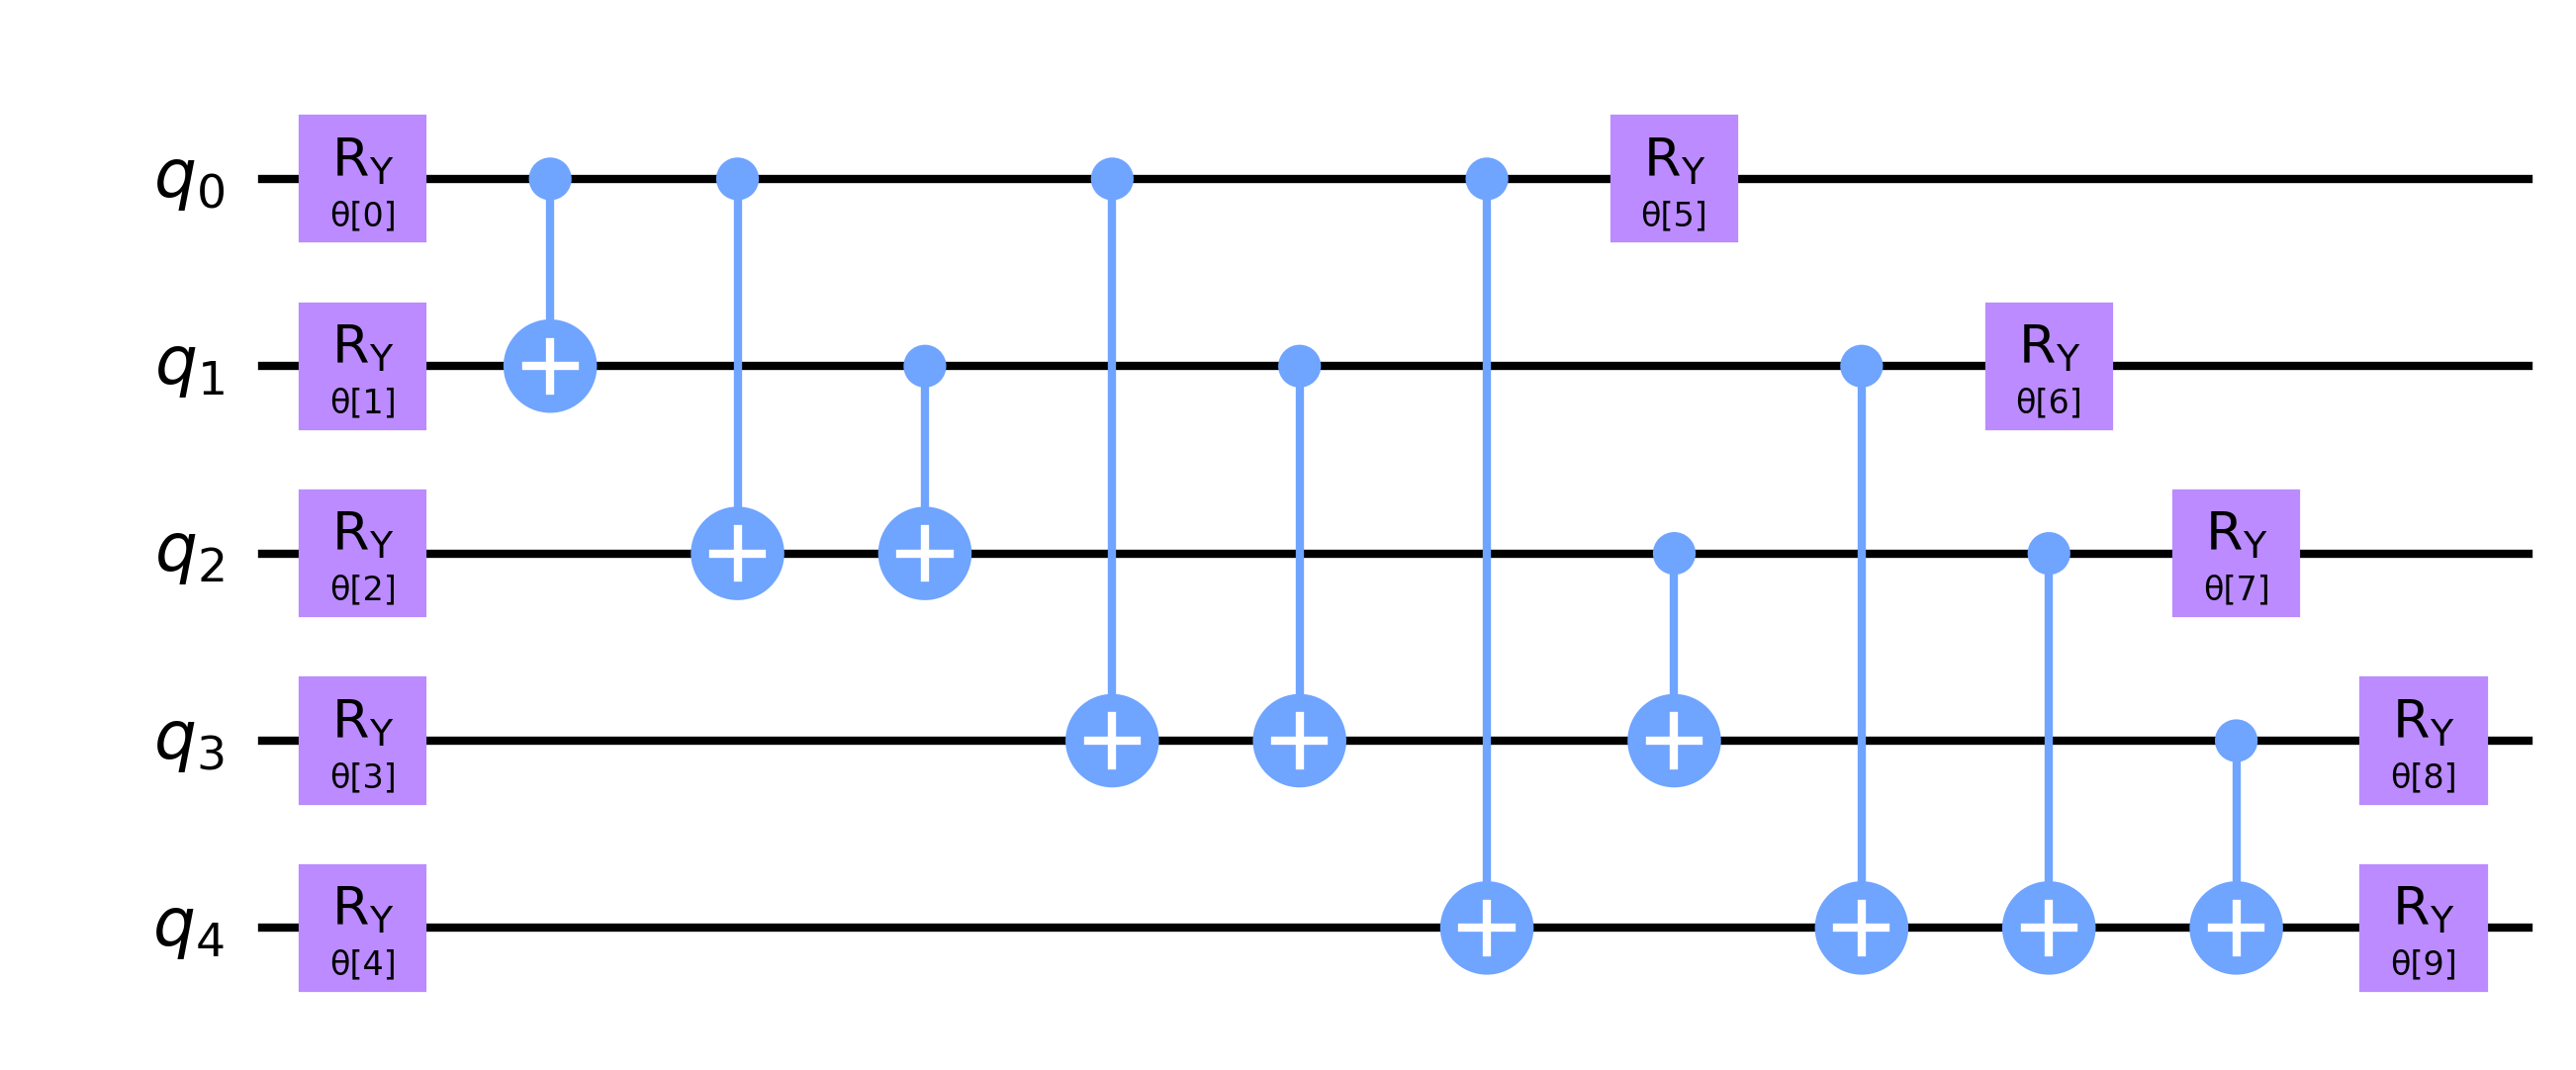

In [7]:
ansatz1 = TwoLocal(5, rotation_blocks=['ry'], entanglement_blocks='cx', entanglement='full', reps=1).decompose()
print(ansatz1.depth())
ansatz1.draw(output='mpl', fold=-1)
# print(ansatz)

In [8]:
optimizers = [COBYLA(maxiter=8000), L_BFGS_B(maxfun=8000), SLSQP(maxiter=1000), NELDER_MEAD(maxfev=8000)]
# from qiskit.algorithms.optimizers import NELDER_MEAD
# optimizers = [SLSQP(maxiter=600)]
converge_cnts1 = np.empty([len(optimizers)], dtype=object)
converge_vals1 = np.empty([len(optimizers)], dtype=object)

repeat = 3
params = None
# params = np.array([0.0 for i in range(ansatz1.num_parameters)])
for i, optimizer in enumerate(optimizers):
    print('Optimizer: {}        '.format(type(optimizer).__name__))
    algorithm_globals.random_seed = 42

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        print(f'\r{eval_count}, {mean}', end='')
    
    best_res1 = None
    for j in range(repeat):
        counts = []
        values = []
        vqe = VQE(ansatz1, optimizer, callback=store_intermediate_result, initial_point=params, 
                quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
        result = vqe.compute_minimum_eigenvalue(operator=h_dvr_pauli)
        print()

        if (best_res1 is None) or (values[-1] < best_res1):
            best_res1 = values[-1]
            converge_cnts1[i] = np.asarray(counts)
            converge_vals1[i] = np.asarray(values)
print('\nOptimization complete      ')

Optimizer: COBYLA        
2101, -114.06064638706039
1761, -114.06075128611144
2965, -114.06078335110091
Optimizer: L_BFGS_B        
627, -114.06100723516111
506, -114.06100723517405
913, -114.06100723517287
Optimizer: SLSQP        
567, -114.06100720228015
894, -114.06100705947725
570, -114.06100702992504
Optimizer: NELDER_MEAD        
2111, -113.72627586509495
4454, -114.06100718966235
2497, -113.71335811405527

Optimization complete      


COBYLA -114.06078335110091 1.2071012211084167
L_BFGS_B -114.06100723517405 1.20687733703528
SLSQP -114.06100720228015 1.206877369929174
NELDER_MEAD -114.06100718966235 1.2068773825469776
0.08991874864886995


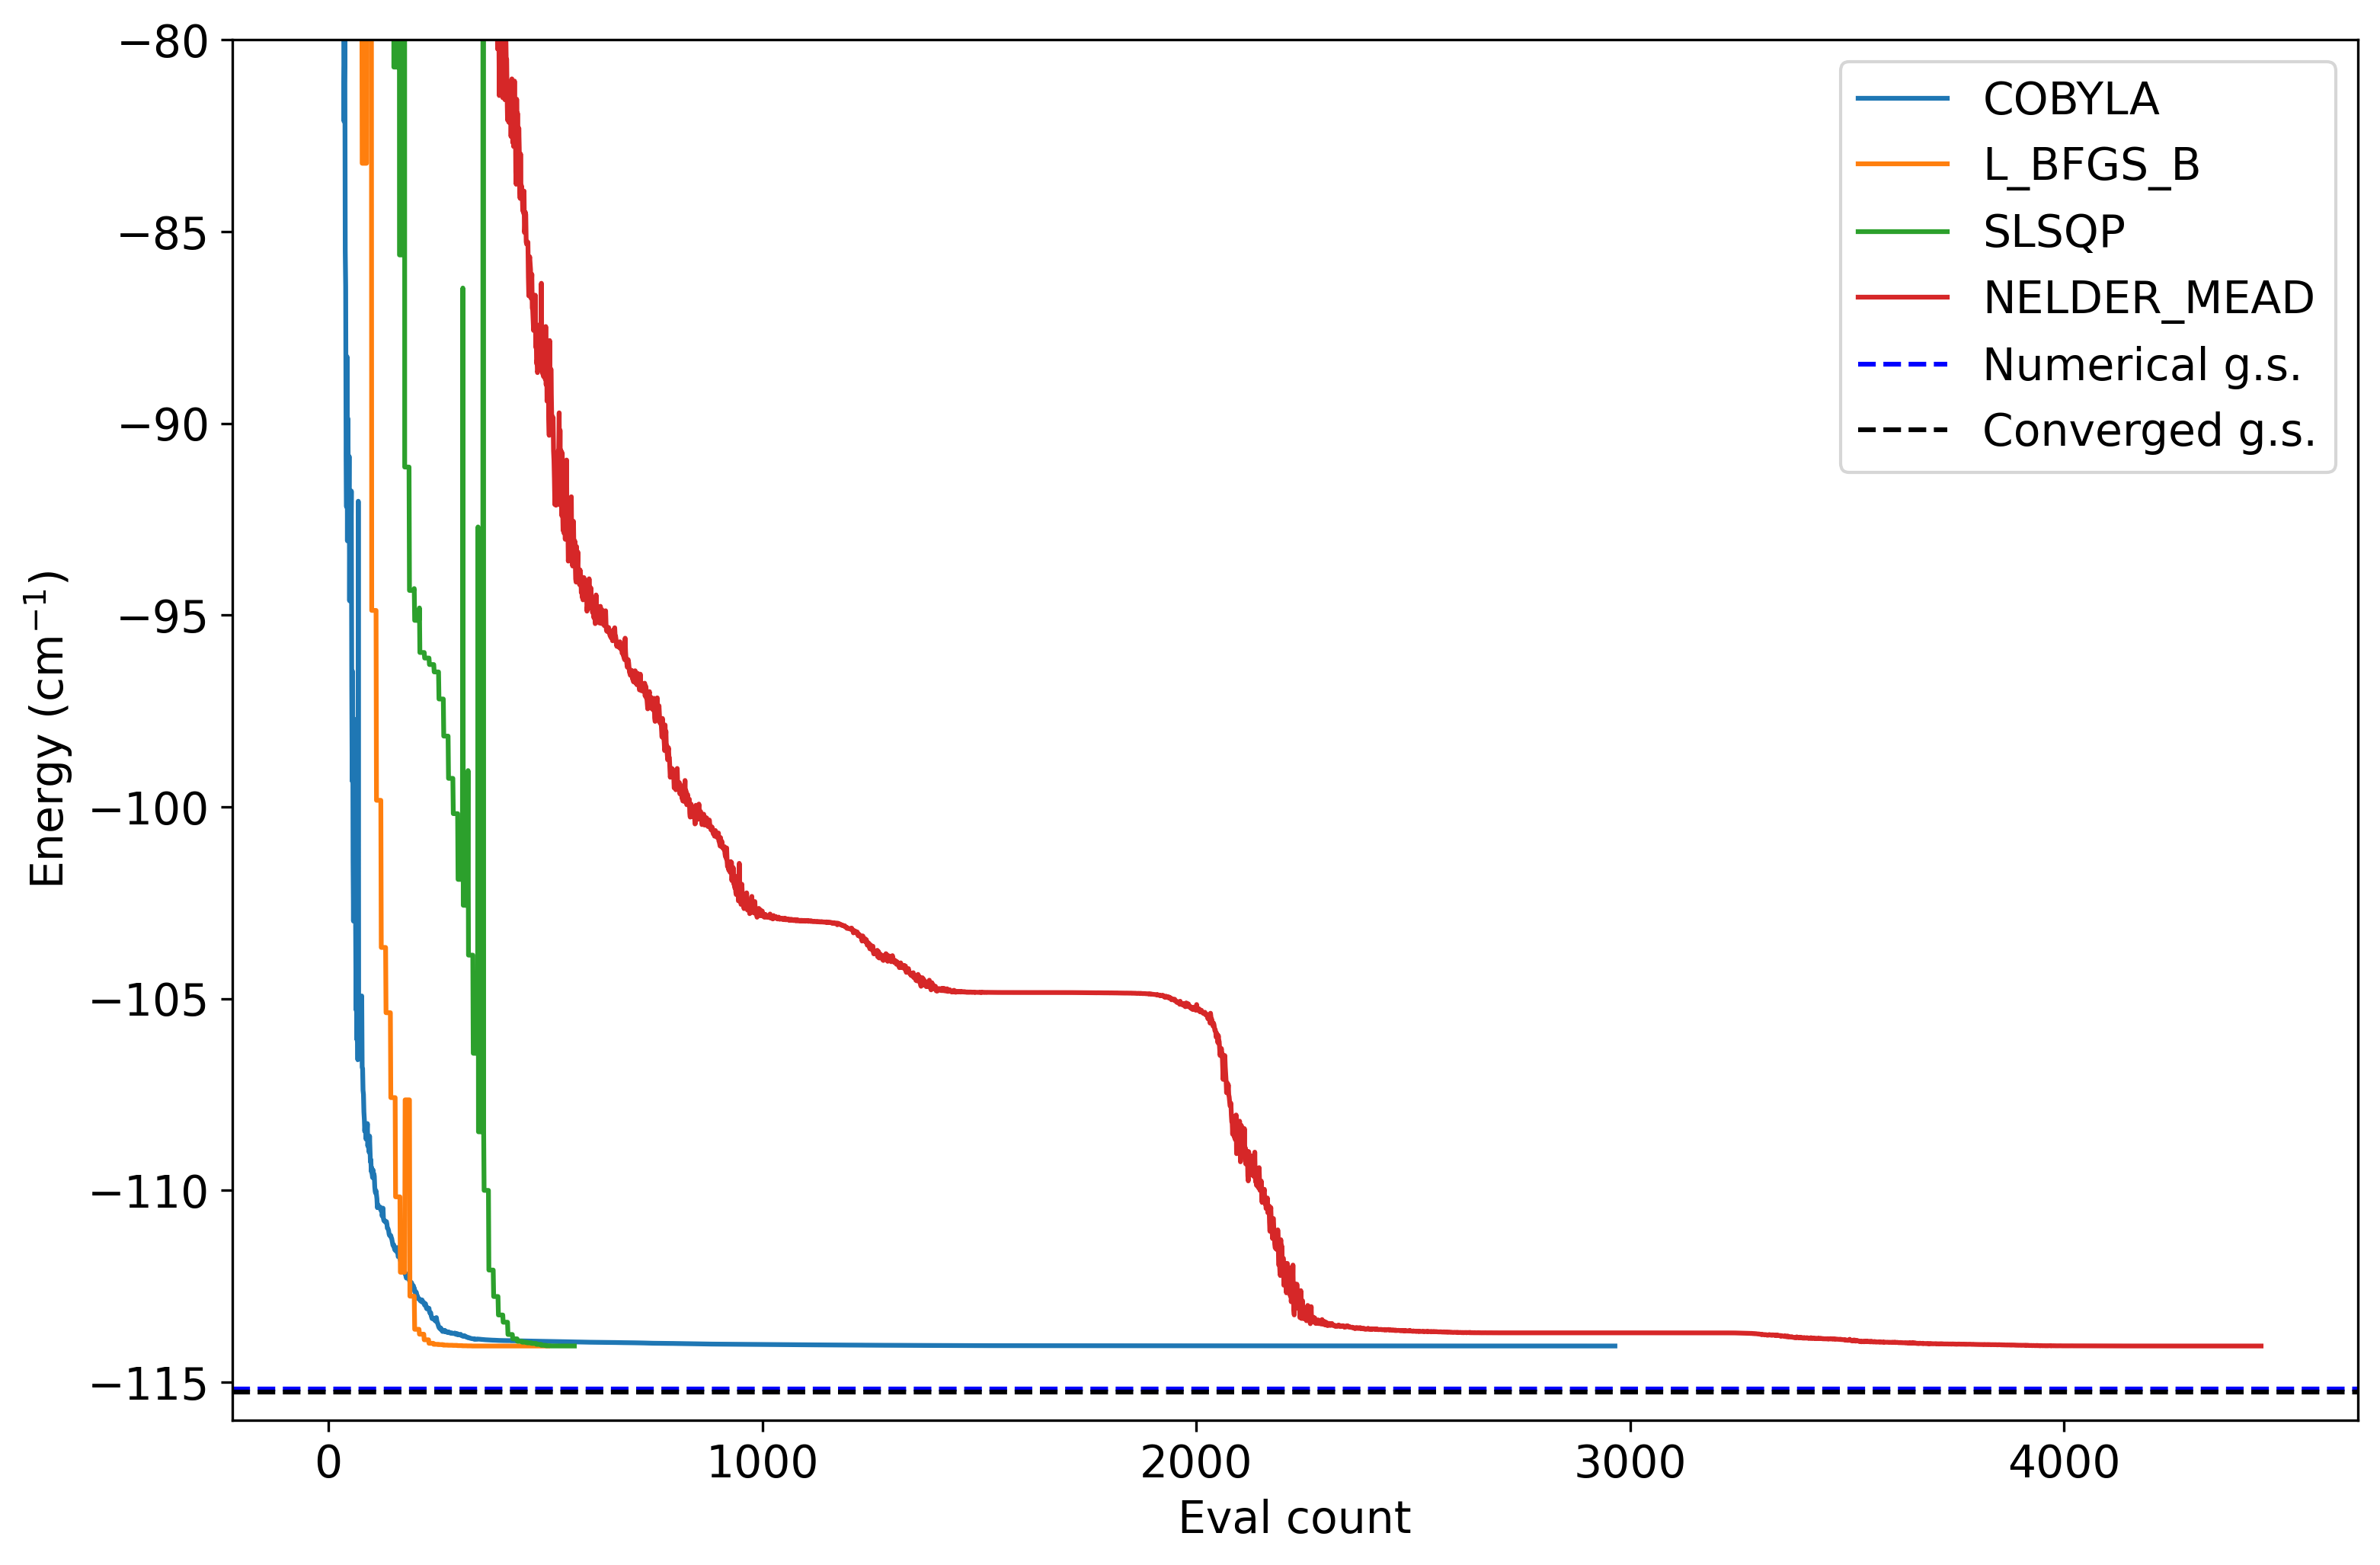

In [9]:
import pylab

ref = -115.26788457220933
# print(converge_cnts1, converge_vals1)
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    print(type(optimizer).__name__, converge_vals1[i][-1], abs(ref - converge_vals1[i][-1]))
    pylab.plot(converge_cnts1[i], converge_vals1[i], label=type(optimizer).__name__)
# pylab.axhline(eigvals[0])

print(abs(ref - eigvals[0]))
pylab.axhline(eigvals[0], ls='--', c='blue', label='Numerical g.s.')
pylab.axhline(ref, ls='--', c='black', label='Converged g.s.')
pylab.xlabel('Eval count')
pylab.ylabel('Energy (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
# pylab.xlim(800, 1000)
pylab.ylim(-116, -80)
pylab.legend(loc='upper right');

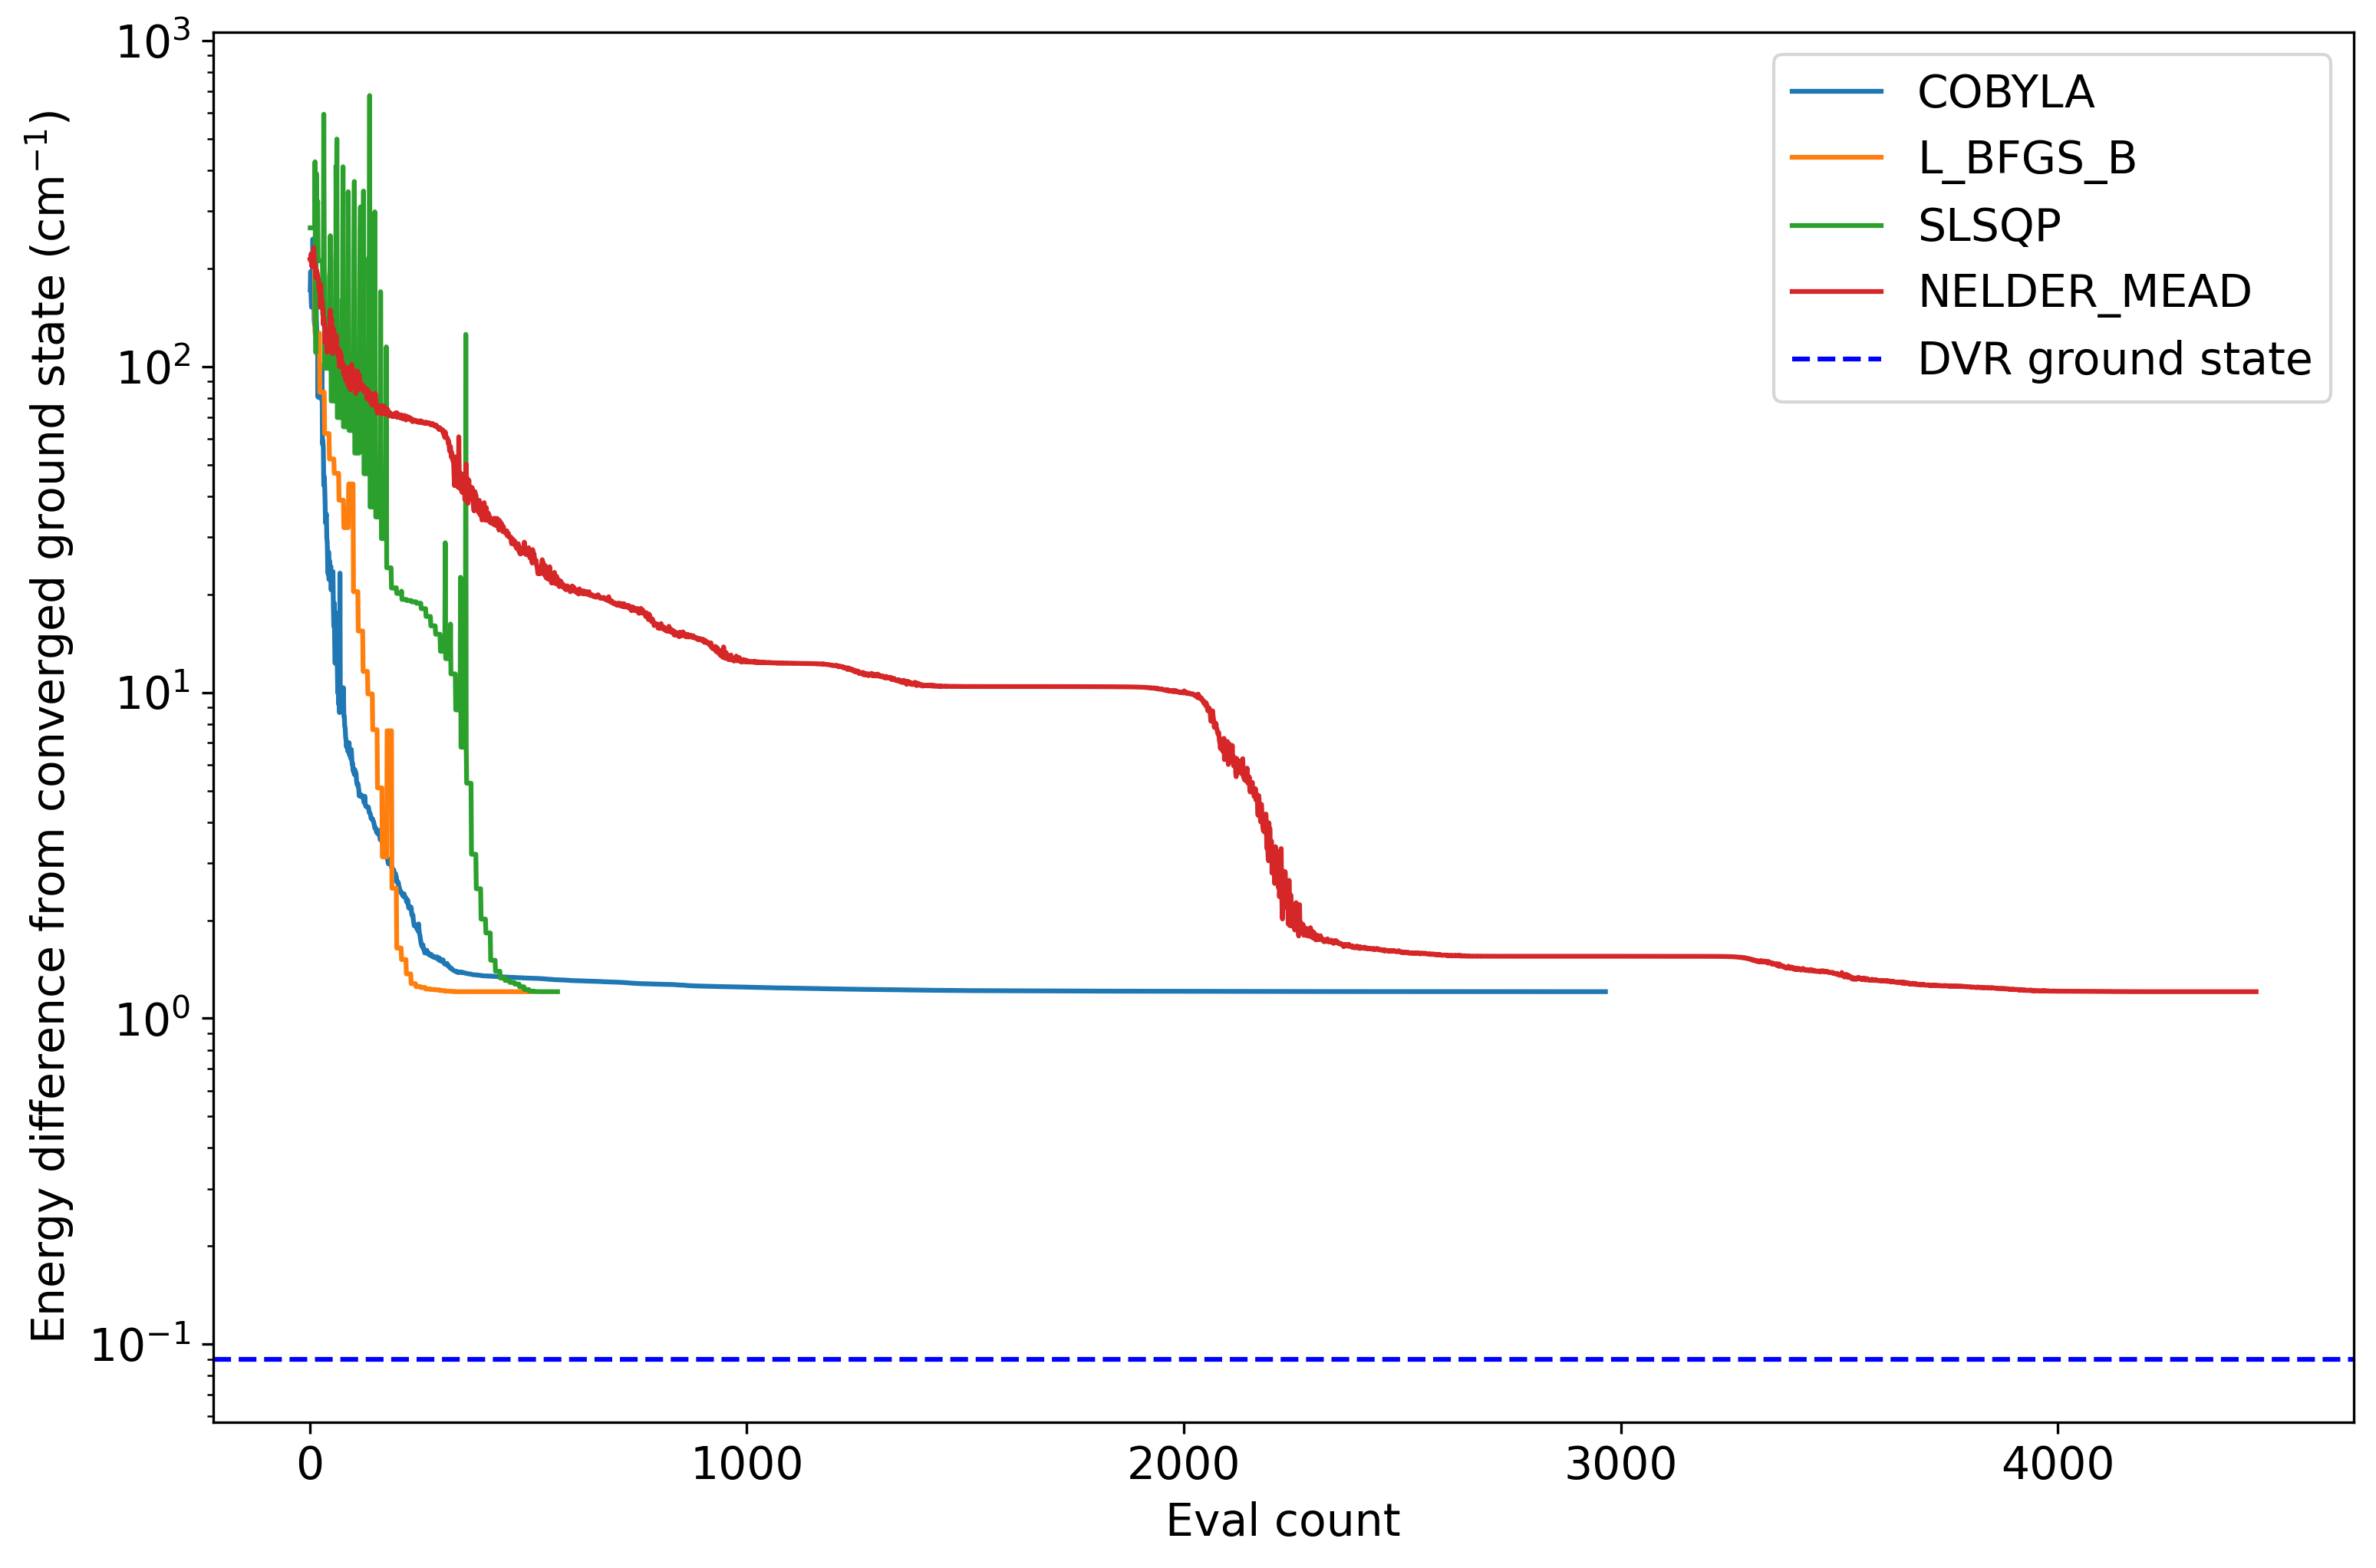

In [10]:
# pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    # pylab.plot(converge_cnts1[i][:], abs(ref - converge_vals1[i][:]), label=type(optimizer).__name__)
    pylab.plot(converge_cnts1[i][:], abs(ref - converge_vals1[i][:]), label=type(optimizer).__name__)
pylab.axhline(abs(ref - eigvals[0]), ls='--', c='blue', label='DVR ground state')
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from converged ground state (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
# plt.ylim(0,1)
pylab.legend(loc='upper right');
# print(abs(ref - converge_vals1[:, -1]))

15


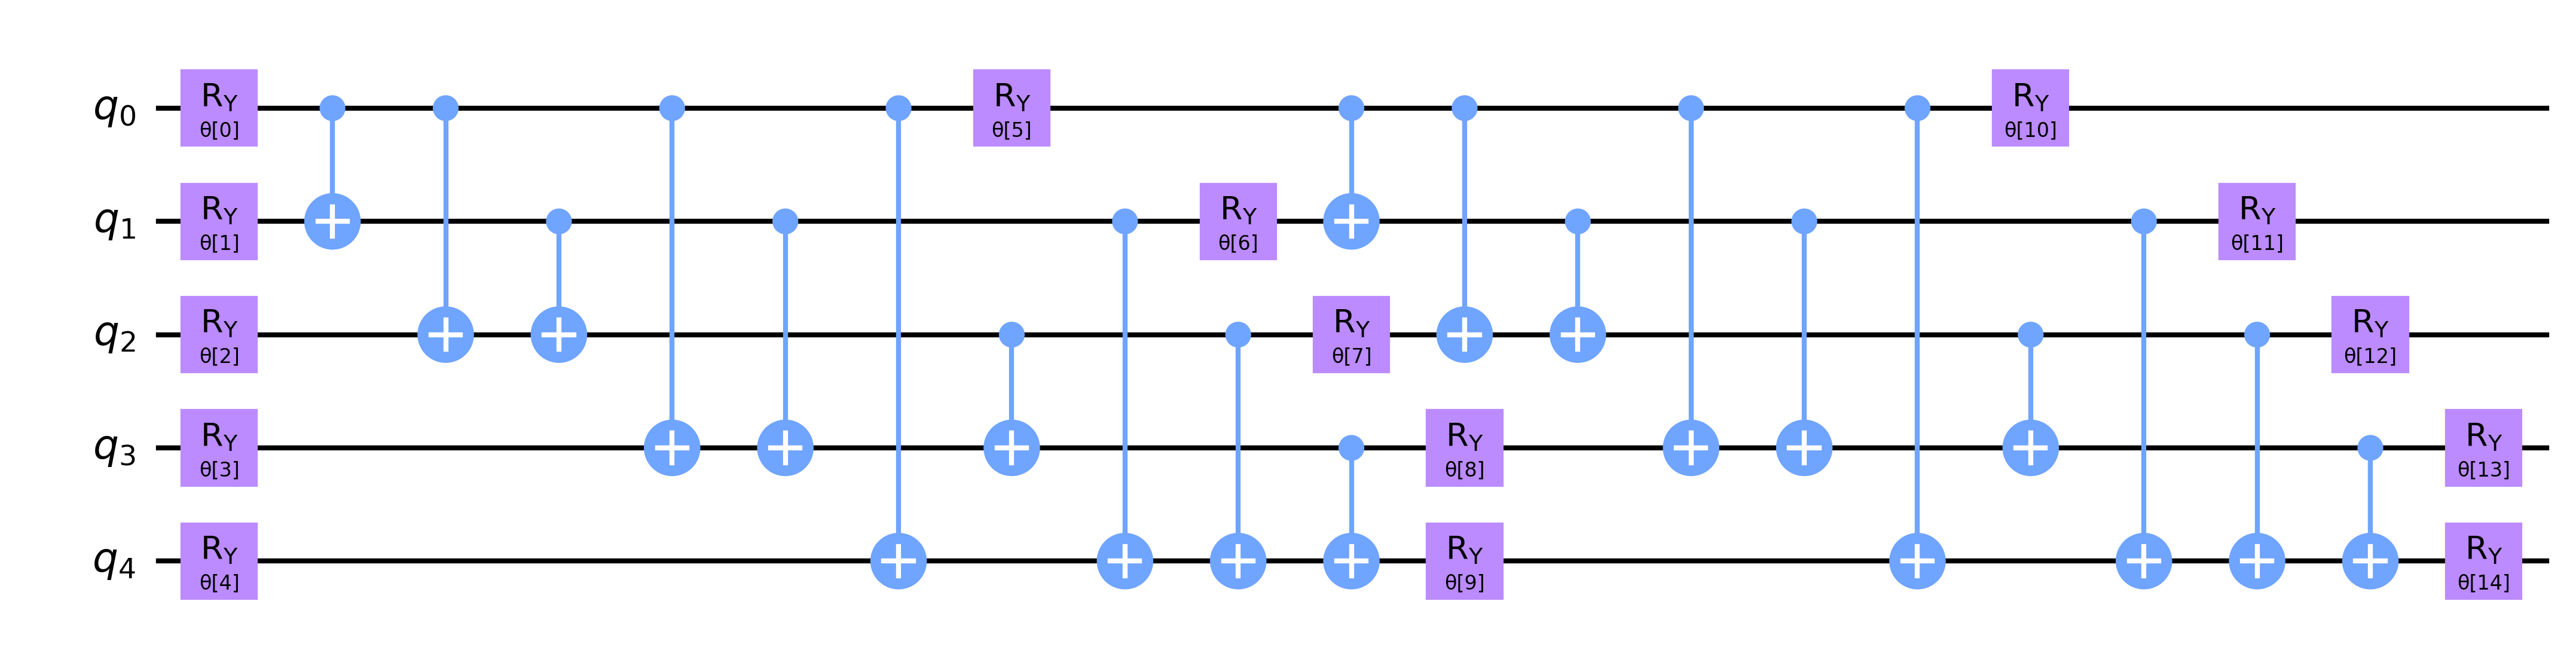

In [11]:
ansatz2 = TwoLocal(5, rotation_blocks=['ry'], entanglement_blocks='cx', entanglement='full', reps=2).decompose()
print(ansatz2.depth())
ansatz2.draw(output='mpl', fold=-1)

In [12]:
optimizers = [COBYLA(maxiter=8000), L_BFGS_B(maxfun=8000), SLSQP(maxiter=1000), NELDER_MEAD(maxfev=8000)]
# from qiskit.algorithms.optimizers import NELDER_MEAD
# optimizers = [SLSQP(maxiter=600)]
converge_cnts2 = np.empty([len(optimizers)], dtype=object)
converge_vals2 = np.empty([len(optimizers)], dtype=object)

repeat = 3
params = None
# params = np.array([0.0 for i in range(ansatz1.num_parameters)])
for i, optimizer in enumerate(optimizers):
    print('Optimizer: {}        '.format(type(optimizer).__name__))
    algorithm_globals.random_seed = 42

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        print(f'\r{eval_count}, {mean}', end='')
    
    best_res2 = None
    for j in range(repeat):
        counts = []
        values = []
        vqe = VQE(ansatz2, optimizer, callback=store_intermediate_result, initial_point=params, 
                quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
        result = vqe.compute_minimum_eigenvalue(operator=h_dvr_pauli)
        print()

        if (best_res2 is None) or (values[-1] < best_res2):
            best_res2 = values[-1]
            converge_cnts2[i] = np.asarray(counts)
            converge_vals2[i] = np.asarray(values)
print('\nOptimization complete      ')

Optimizer: COBYLA        
8000, -114.98358885438066
1549, -115.02454256355168
1477, -114.98940280219253
Optimizer: L_BFGS_B        
4736, -115.04770818006652
8016, -115.02470191055791
6336, -115.02456084866895
Optimizer: SLSQP        
727, -115.02461167566973
1801, -115.04770796944379
1332, -115.02456553846501
Optimizer: NELDER_MEAD        
5439, -114.99038449241573
6056, -113.68548519952064
8000, -114.31554520008461

Optimization complete      


COBYLA -115.02454256355168 0.243342008657649
L_BFGS_B -115.04770818006652 0.22017639214280393
SLSQP -115.04770796944379 0.22017660276553386
NELDER_MEAD -114.99038449241573 0.27750007979359737
0.08991874864886995


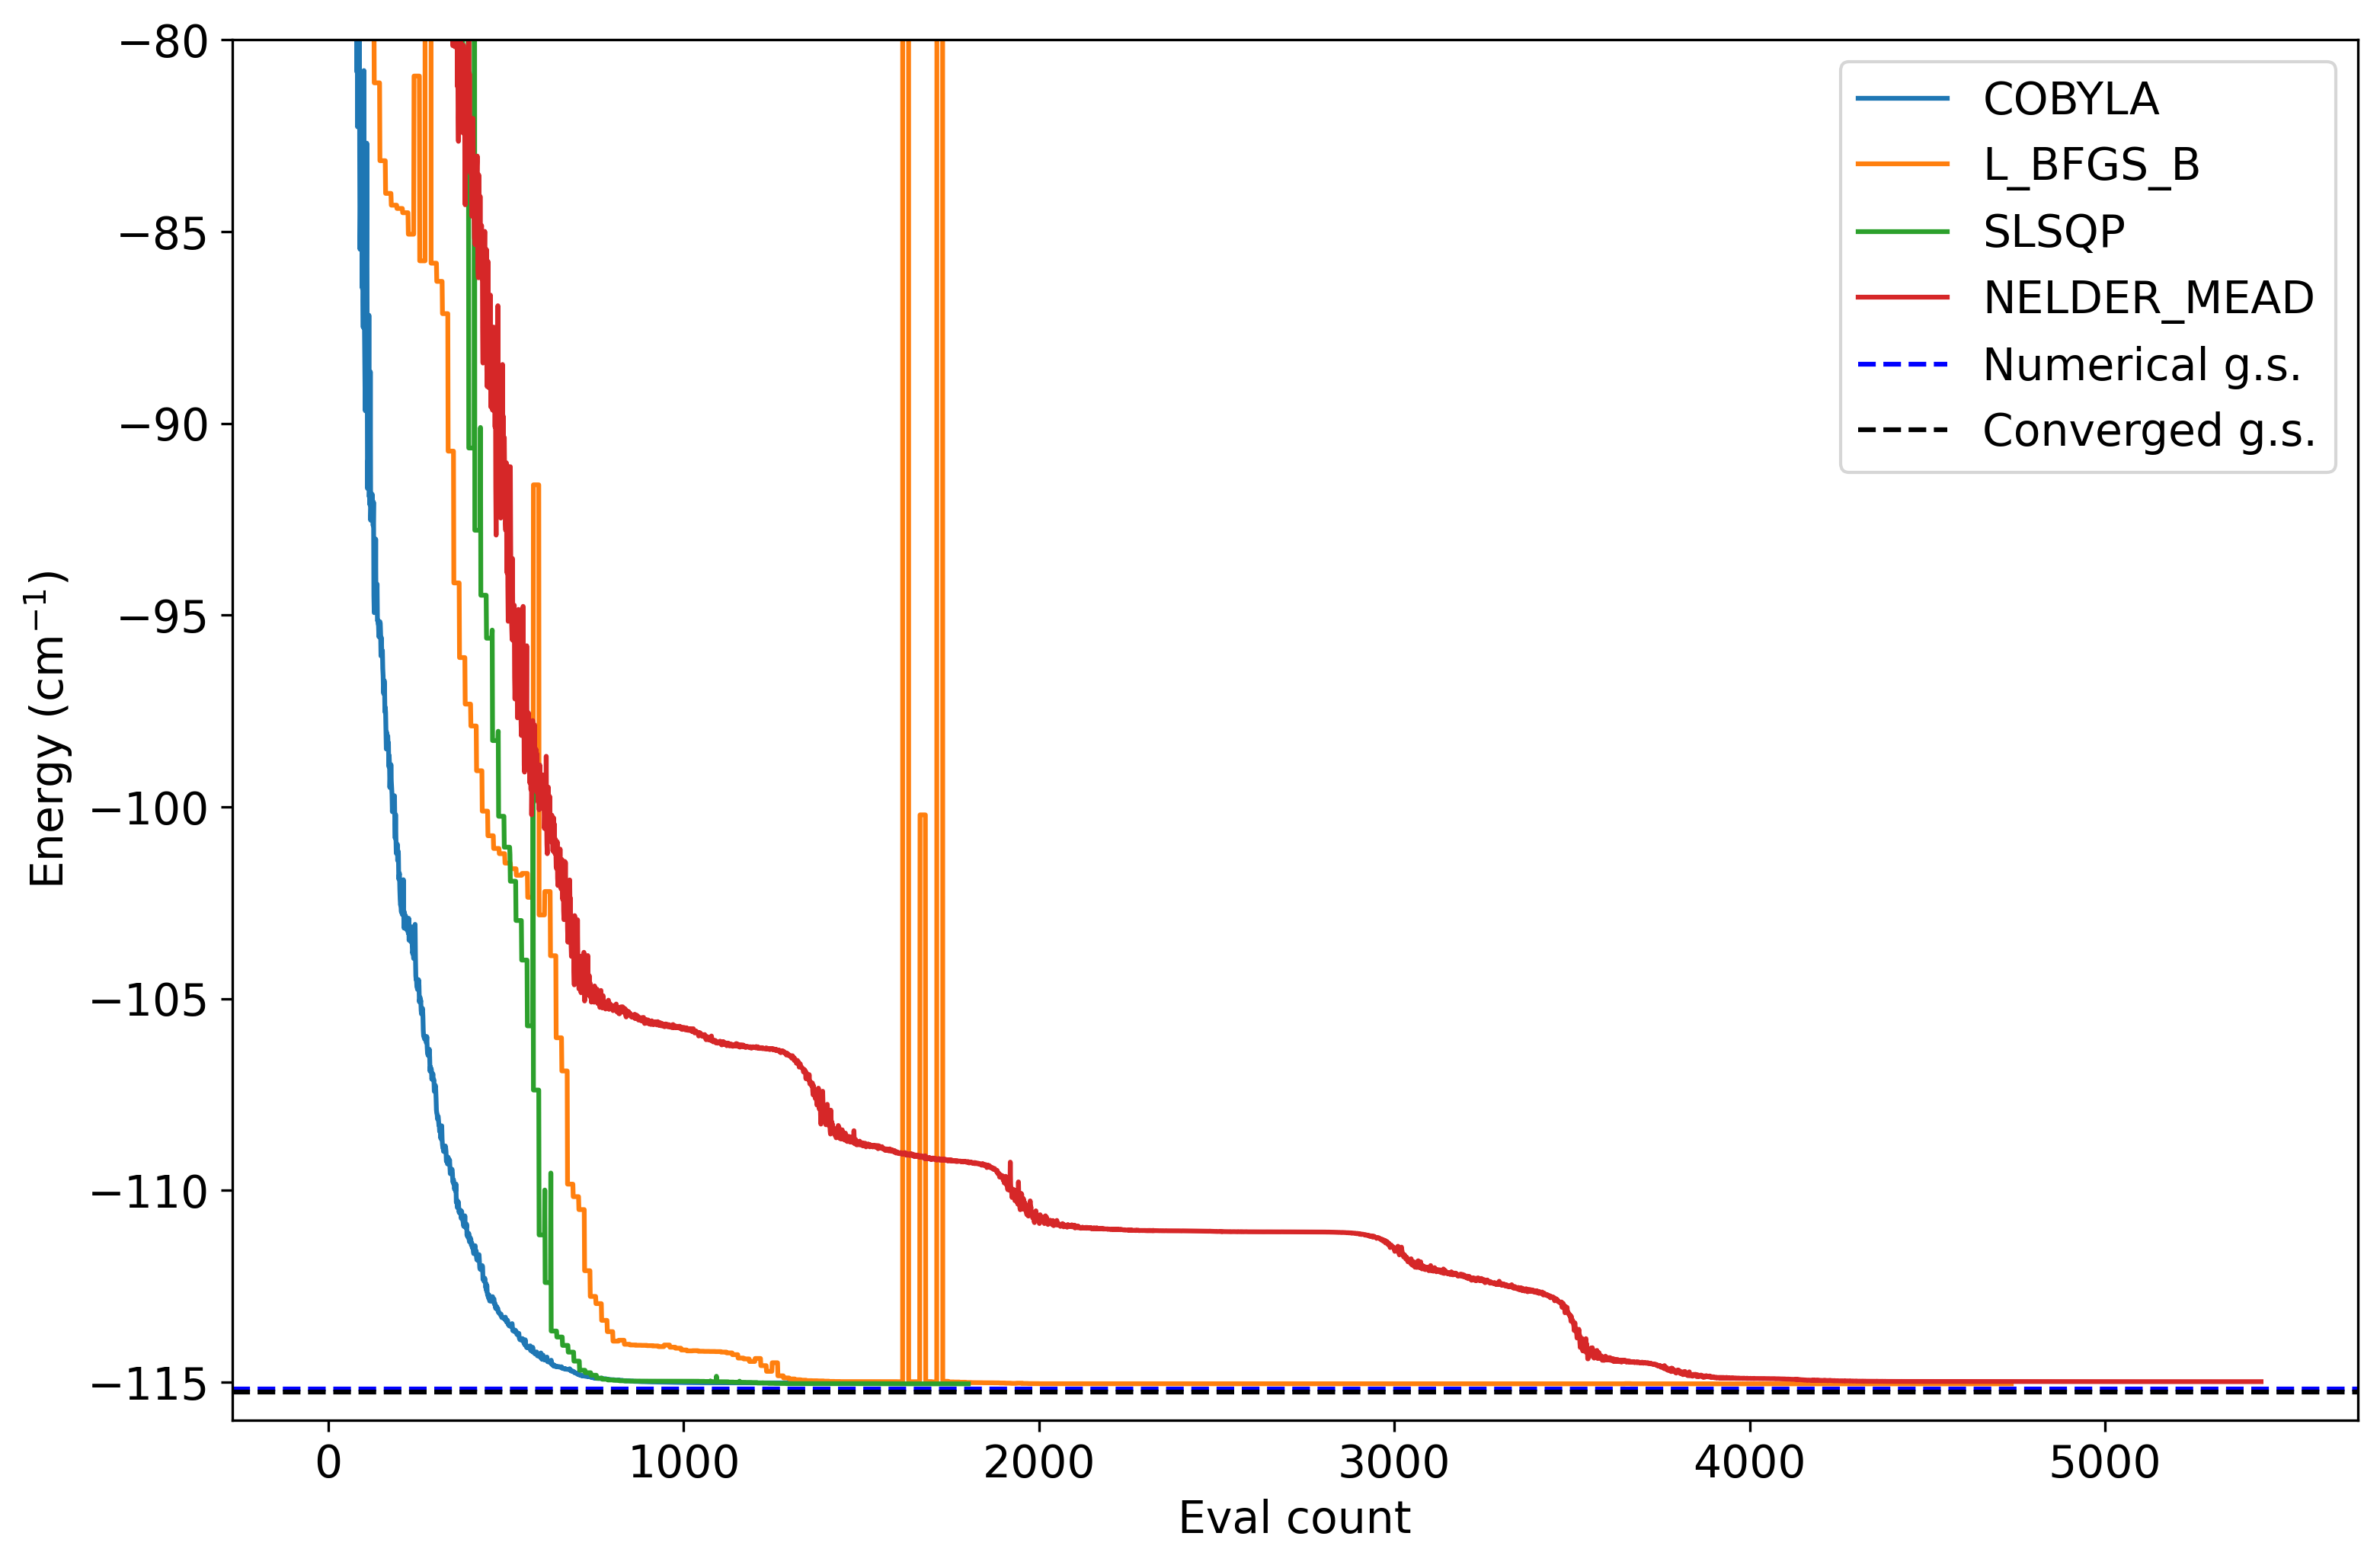

In [13]:
import pylab

ref = -115.26788457220933
# print(converge_cnts2, converge_vals2)
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    print(type(optimizer).__name__, converge_vals2[i][-1], abs(ref - converge_vals2[i][-1]))
    pylab.plot(converge_cnts2[i], converge_vals2[i], label=type(optimizer).__name__)
# pylab.axhline(eigvals[0])

print(abs(ref - eigvals[0]))
pylab.axhline(eigvals[0], ls='--', c='blue', label='Numerical g.s.')
pylab.axhline(ref, ls='--', c='black', label='Converged g.s.')
pylab.xlabel('Eval count')
pylab.ylabel('Energy (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
# pylab.xlim(800, 1000)
pylab.ylim(-116, -80)
pylab.legend(loc='upper right');

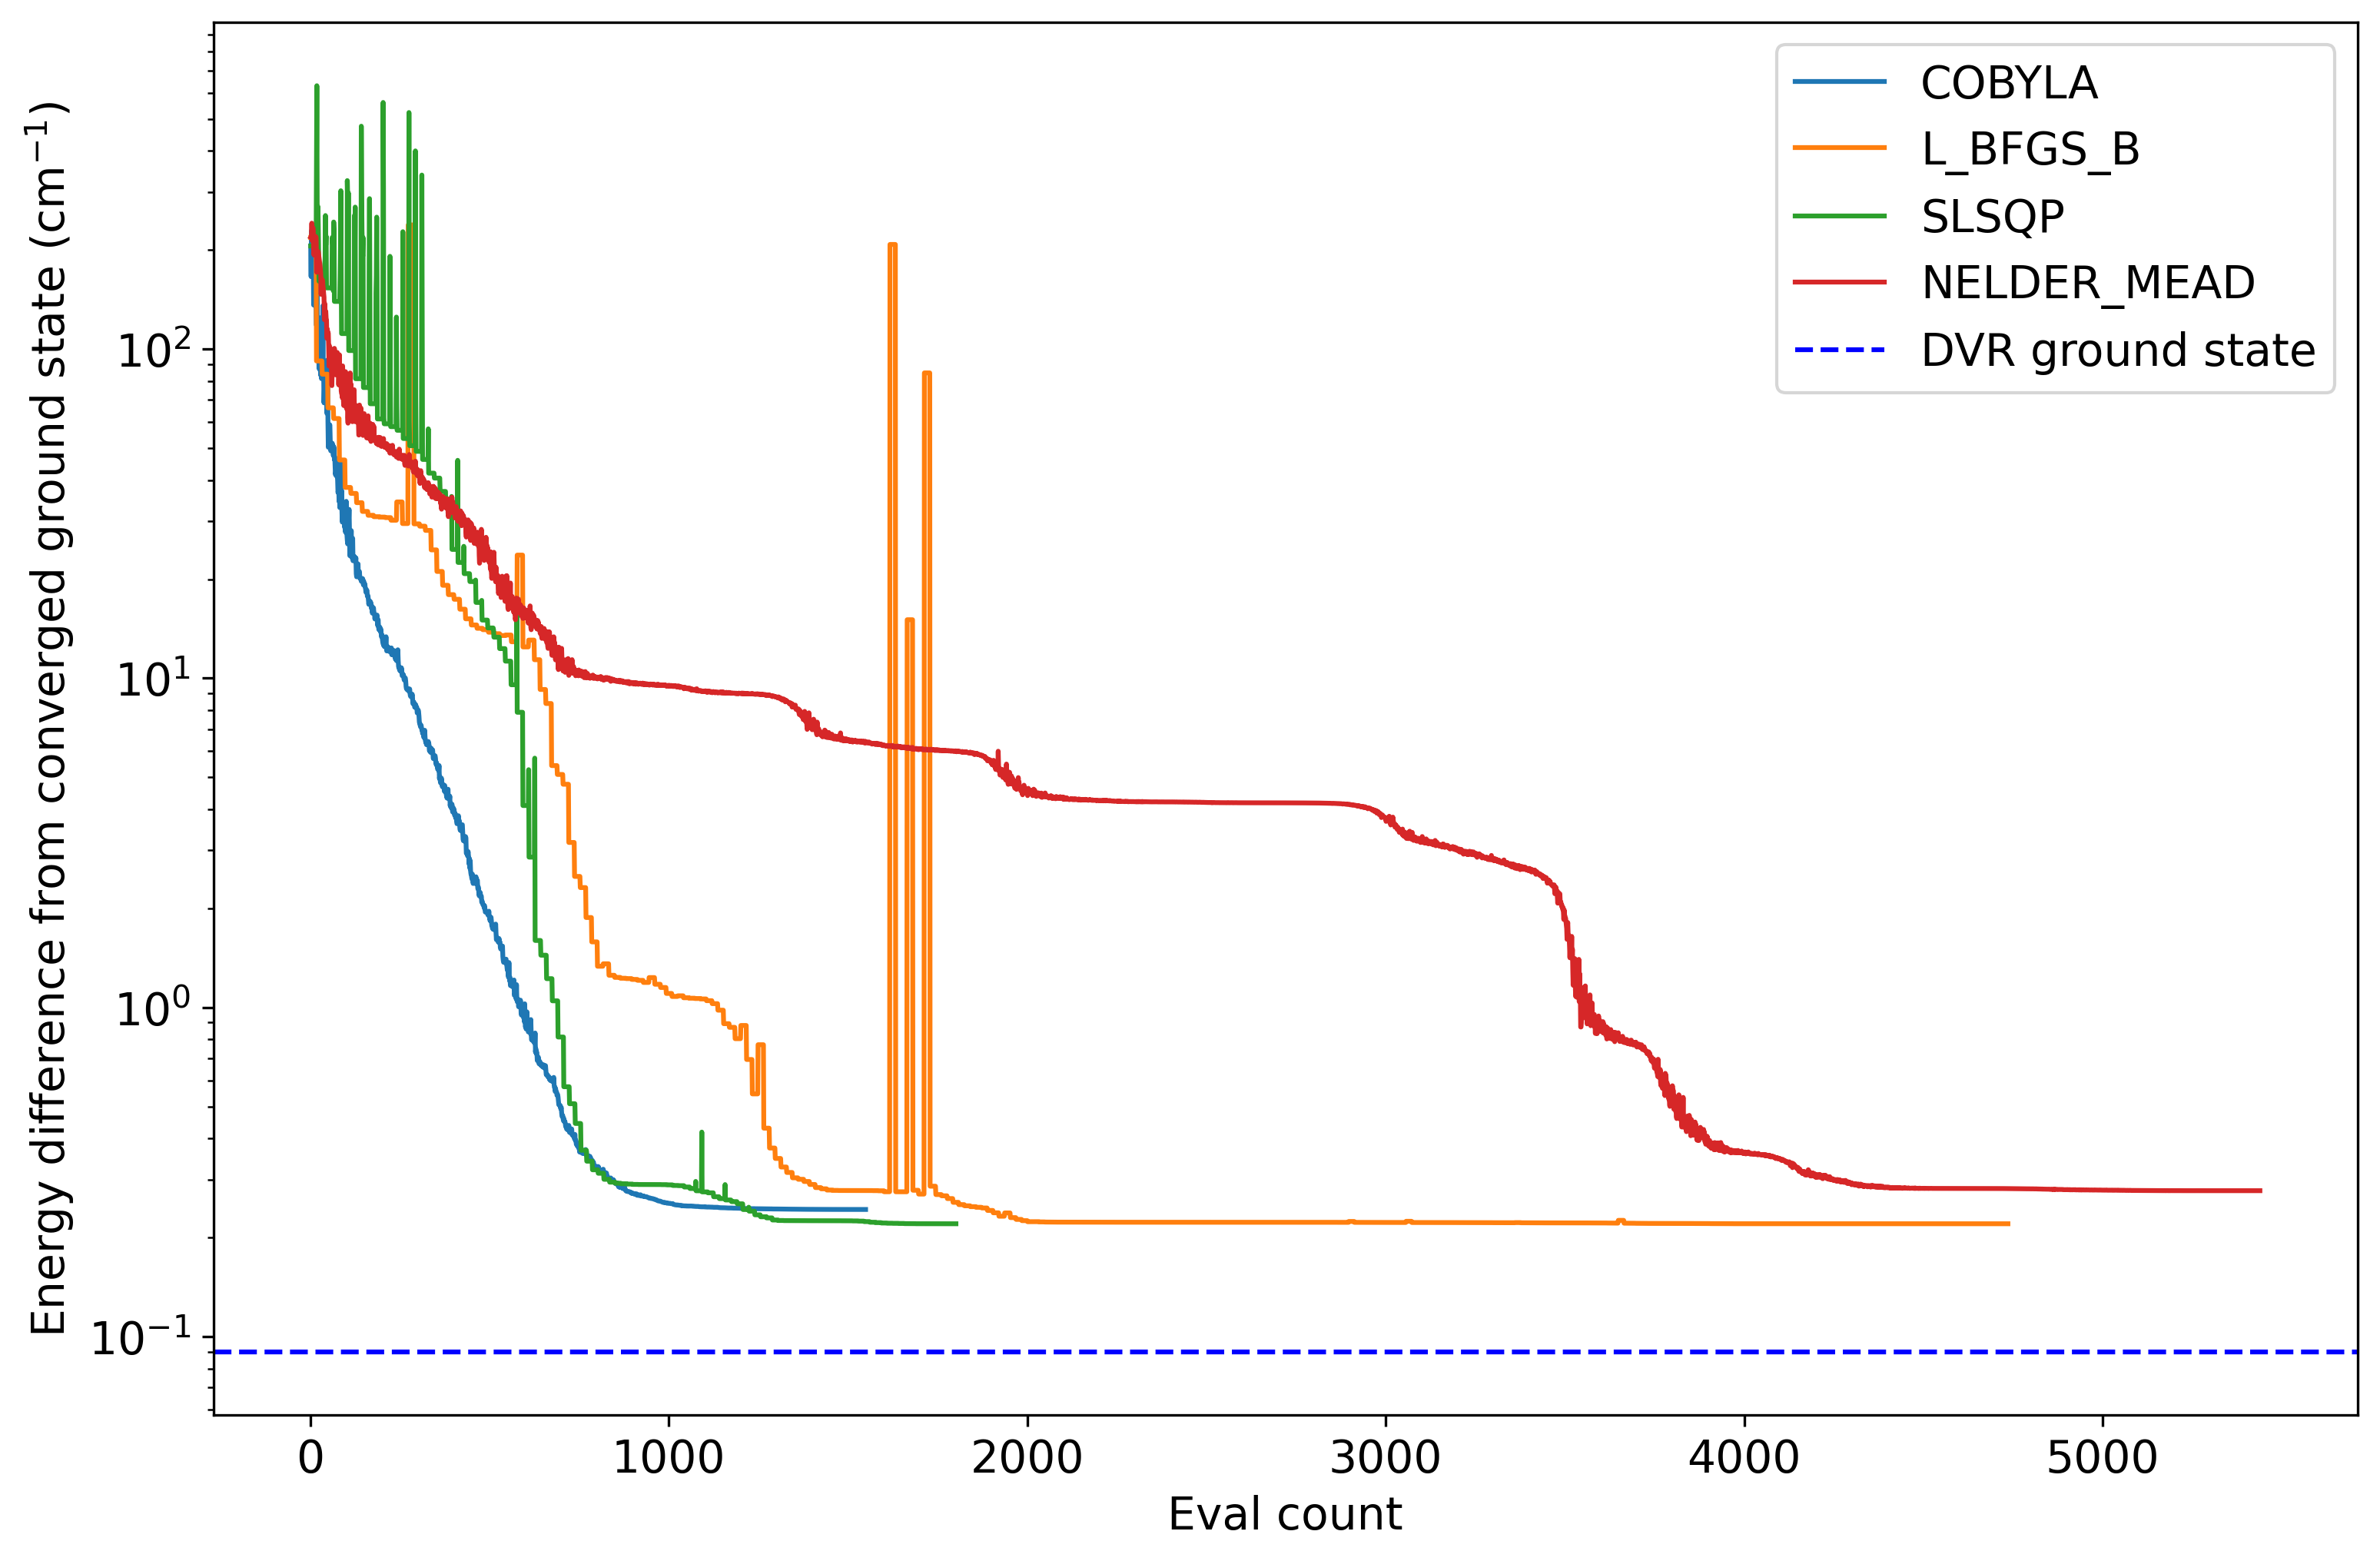

In [14]:
# pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    # pylab.plot(converge_cnts2[i][:], abs(ref - converge_vals2[i][:]), label=type(optimizer).__name__)
    pylab.plot(converge_cnts2[i][:], abs(ref - converge_vals2[i][:]), label=type(optimizer).__name__)
pylab.axhline(abs(ref - eigvals[0]), ls='--', c='blue', label='DVR ground state')
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from converged ground state (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
# plt.ylim(0,1)
pylab.legend(loc='upper right');
# print(abs(ref - converge_vals2[:, -1]))

15


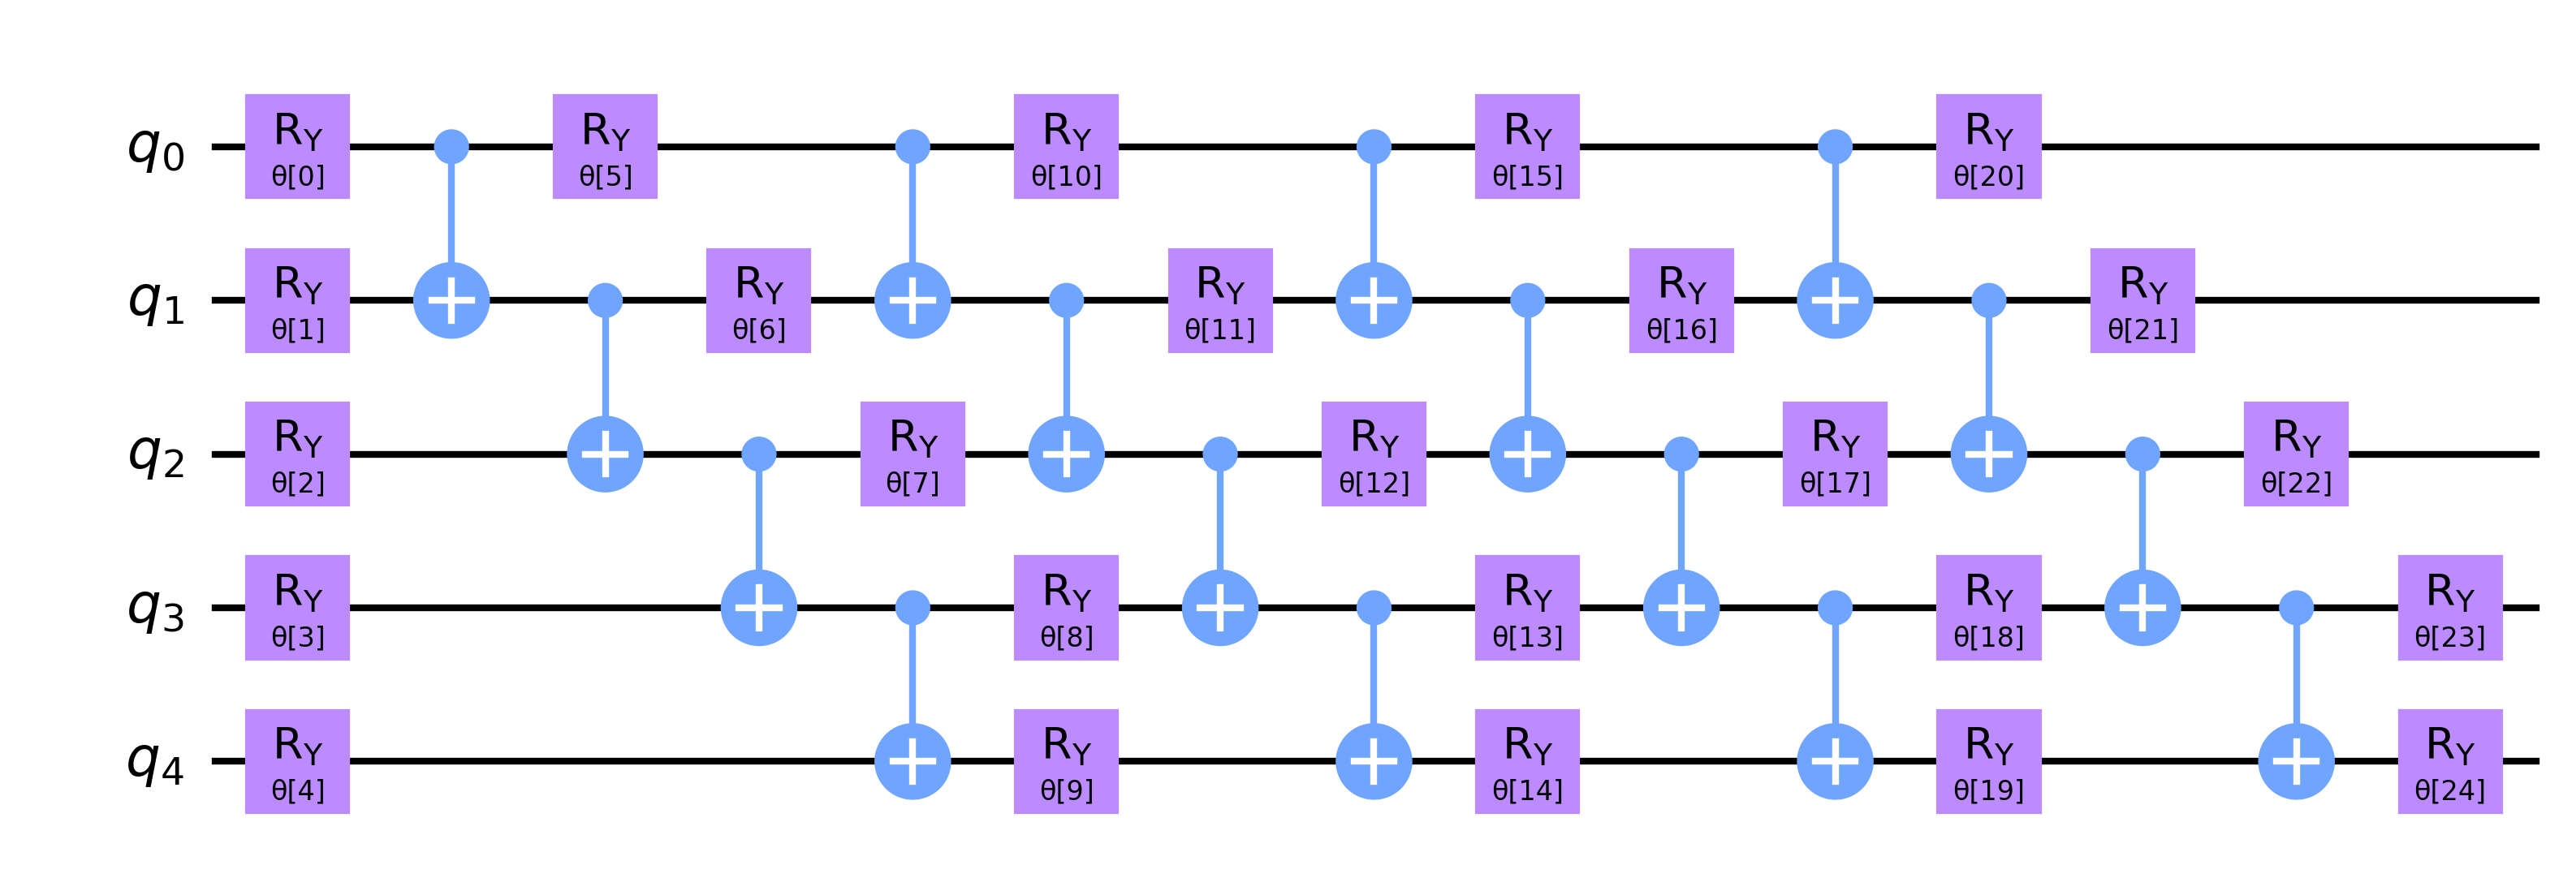

In [4]:
ansatz3 = TwoLocal(5, rotation_blocks=['ry'], entanglement_blocks='cx', entanglement='linear', reps=4).decompose()
print(ansatz3.depth())
ansatz3.draw(output='mpl', fold=-1)

In [16]:
optimizers = [COBYLA(maxiter=8000), L_BFGS_B(maxfun=8000), SLSQP(maxiter=1000), NELDER_MEAD(maxfev=8000)]
# from qiskit.algorithms.optimizers import NELDER_MEAD
# optimizers = [SLSQP(maxiter=600)]
converge_cnts3 = np.empty([len(optimizers)], dtype=object)
converge_vals3 = np.empty([len(optimizers)], dtype=object)

repeat = 3
params = None
# params = np.array([0.0 for i in range(ansatz1.num_parameters)])
for i, optimizer in enumerate(optimizers):
    print('Optimizer: {}        '.format(type(optimizer).__name__))
    algorithm_globals.random_seed = 42

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        print(f'\r{eval_count}, {mean}', end='')
    
    best_res3 = None
    for j in range(repeat):
        counts = []
        values = []
        vqe = VQE(ansatz3, optimizer, callback=store_intermediate_result, initial_point=params, 
                quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
        result = vqe.compute_minimum_eigenvalue(operator=h_dvr_pauli)
        print()

        if (best_res3 is None) or (values[-1] < best_res3):
            best_res3 = values[-1]
            converge_cnts3[i] = np.asarray(counts)
            converge_vals3[i] = np.asarray(values)
print('\nOptimization complete      ')

Optimizer: COBYLA        
2169, -115.02745326627914
4299, -115.02727876988845
1820, -115.02959760199562
Optimizer: L_BFGS_B        
8016, -115.03267508100416
6624, -115.03416428011337
5952, -115.03416428001628
Optimizer: SLSQP        
1320, -114.07399169906103
959, -115.02819692500238
1257, -115.03379432713996
Optimizer: NELDER_MEAD        
8000, -114.40971482843264
6609, -113.716888131426592
8000, -112.76492391637102

Optimization complete      


COBYLA -115.02959760199562 0.23828697021370715
L_BFGS_B -115.0341642801133 0.23372029209602374
SLSQP -115.03379432713996 0.2340902450693676
NELDER_MEAD -114.40971482843264 0.8581697437766849
0.08991874864886995


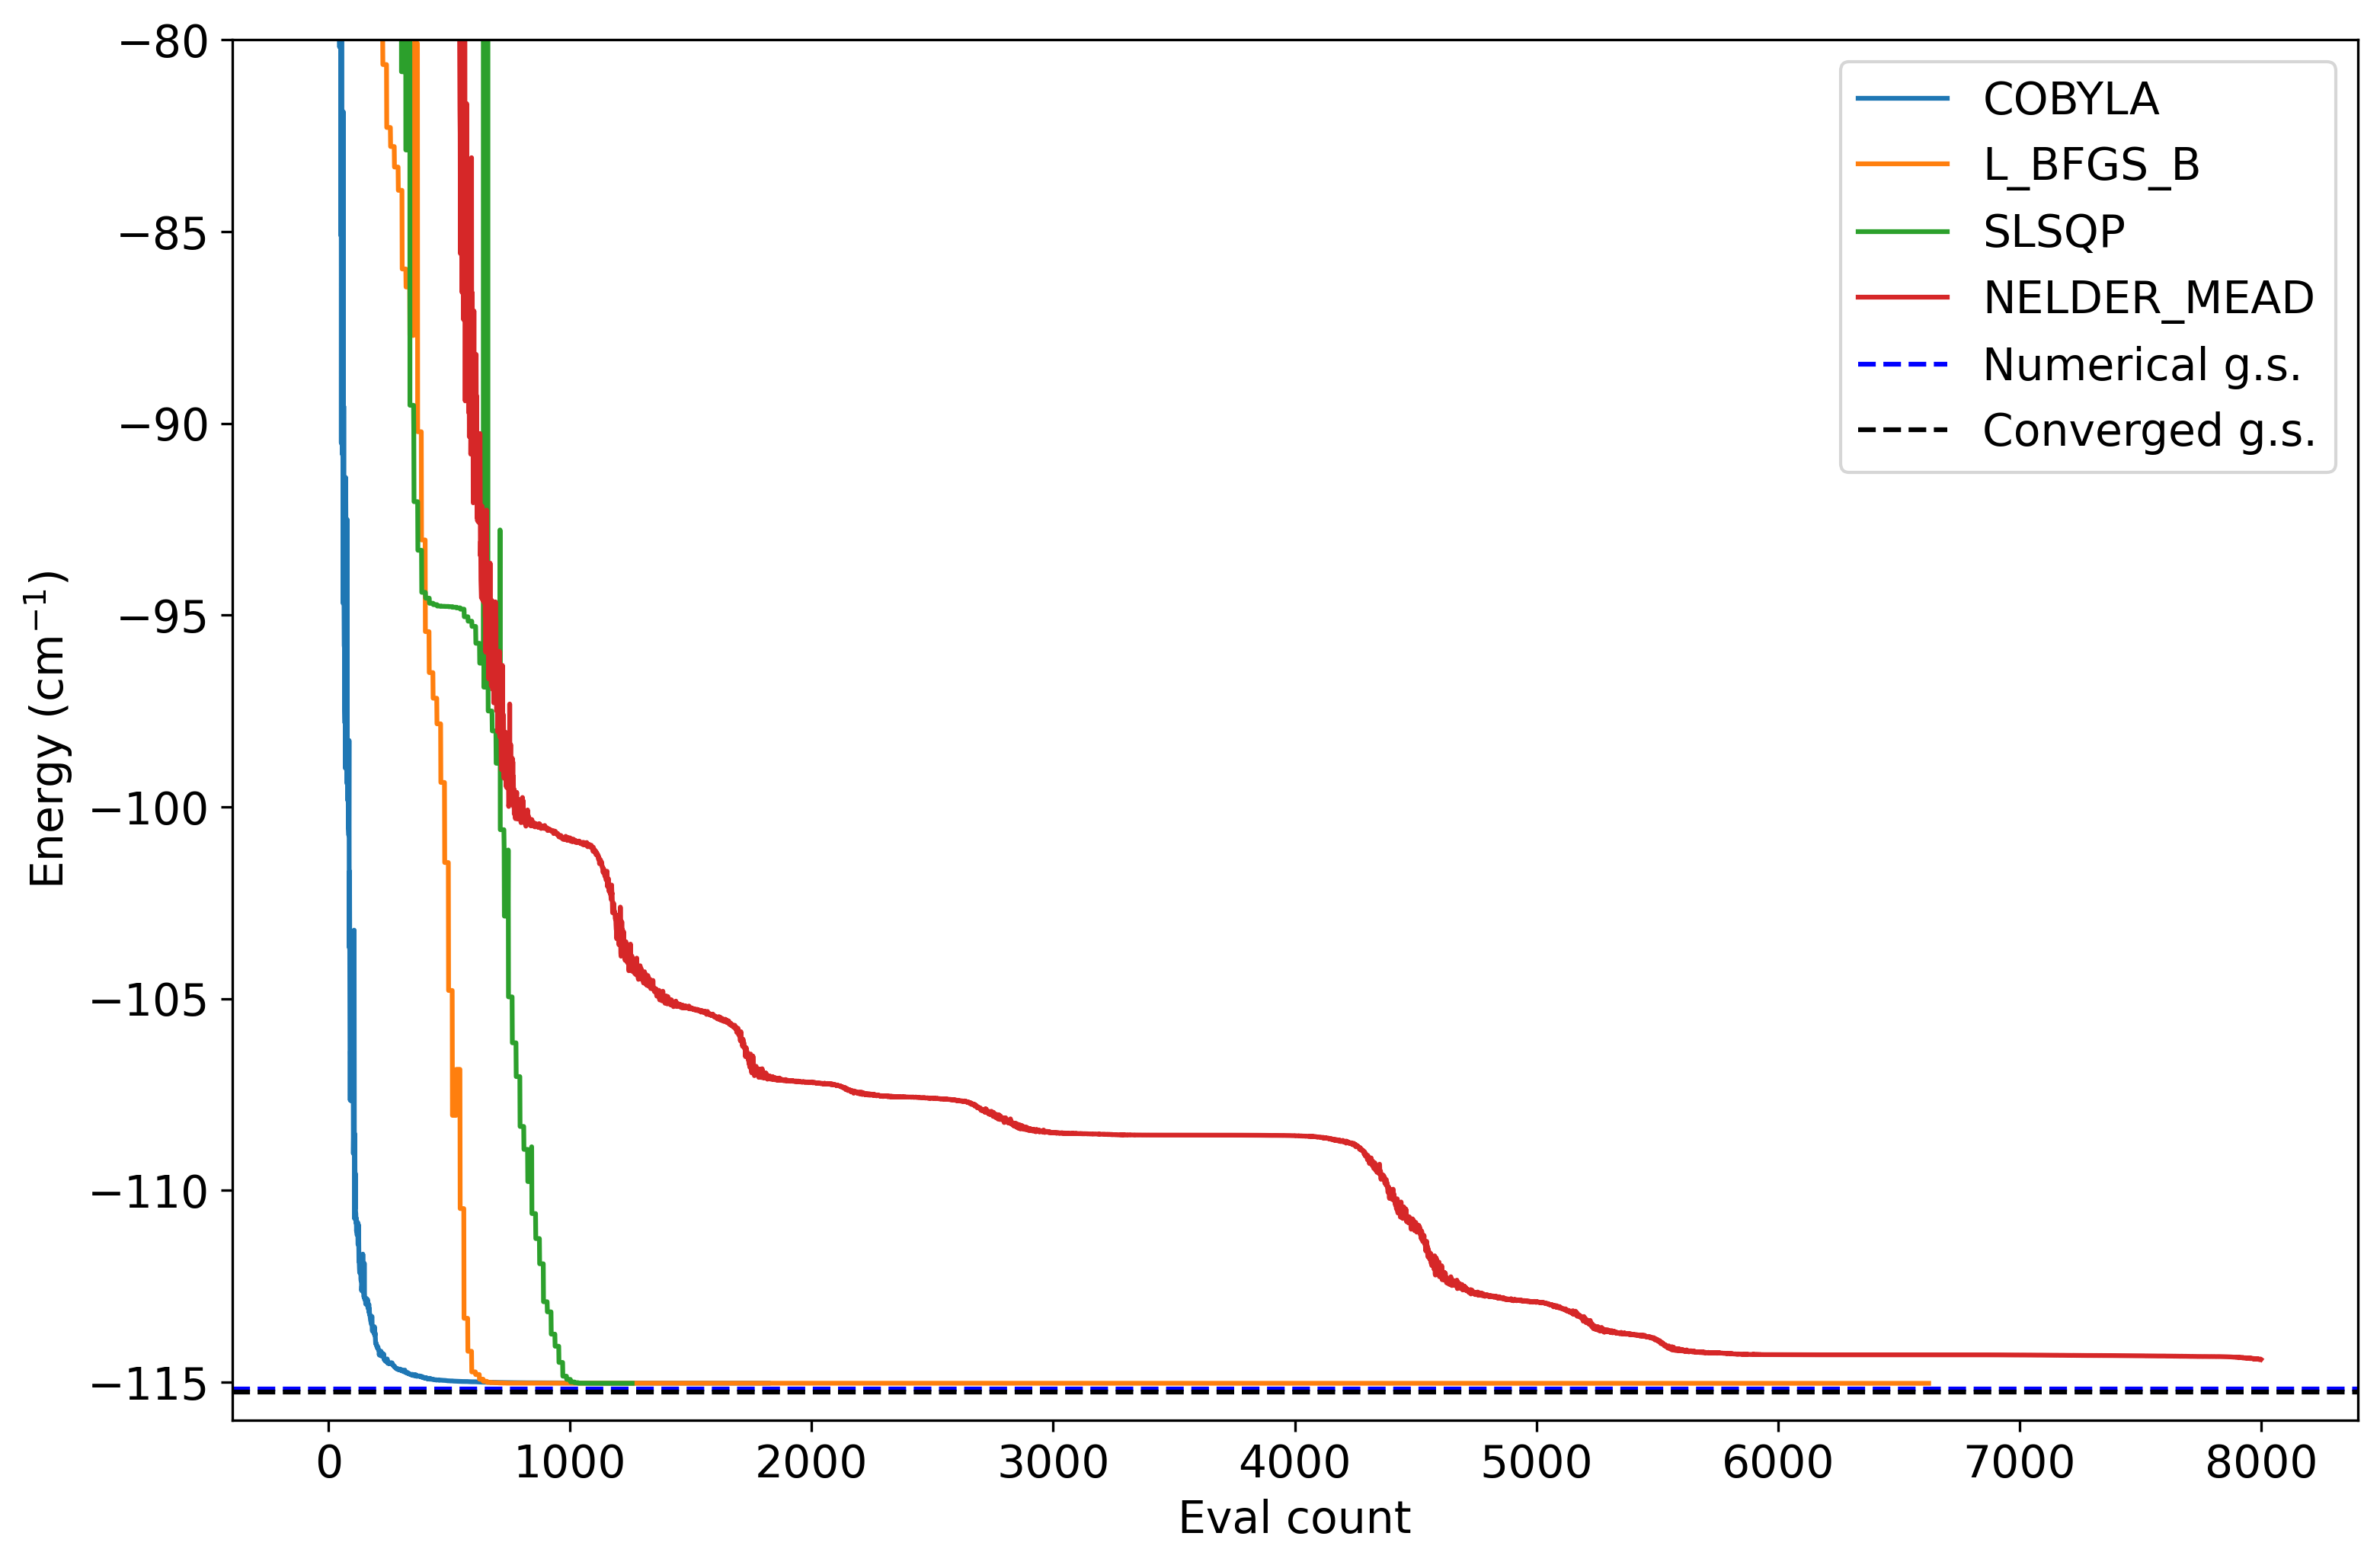

In [17]:
import pylab

ref = -115.26788457220933
# print(converge_cnts3, converge_vals3)
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    print(type(optimizer).__name__, converge_vals3[i][-1], abs(ref - converge_vals3[i][-1]))
    pylab.plot(converge_cnts3[i], converge_vals3[i], label=type(optimizer).__name__)
# pylab.axhline(eigvals[0])

print(abs(ref - eigvals[0]))
pylab.axhline(eigvals[0], ls='--', c='blue', label='Numerical g.s.')
pylab.axhline(ref, ls='--', c='black', label='Converged g.s.')
pylab.xlabel('Eval count')
pylab.ylabel('Energy (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
# pylab.xlim(800, 1000)
pylab.ylim(-116, -80)
pylab.legend(loc='upper right');

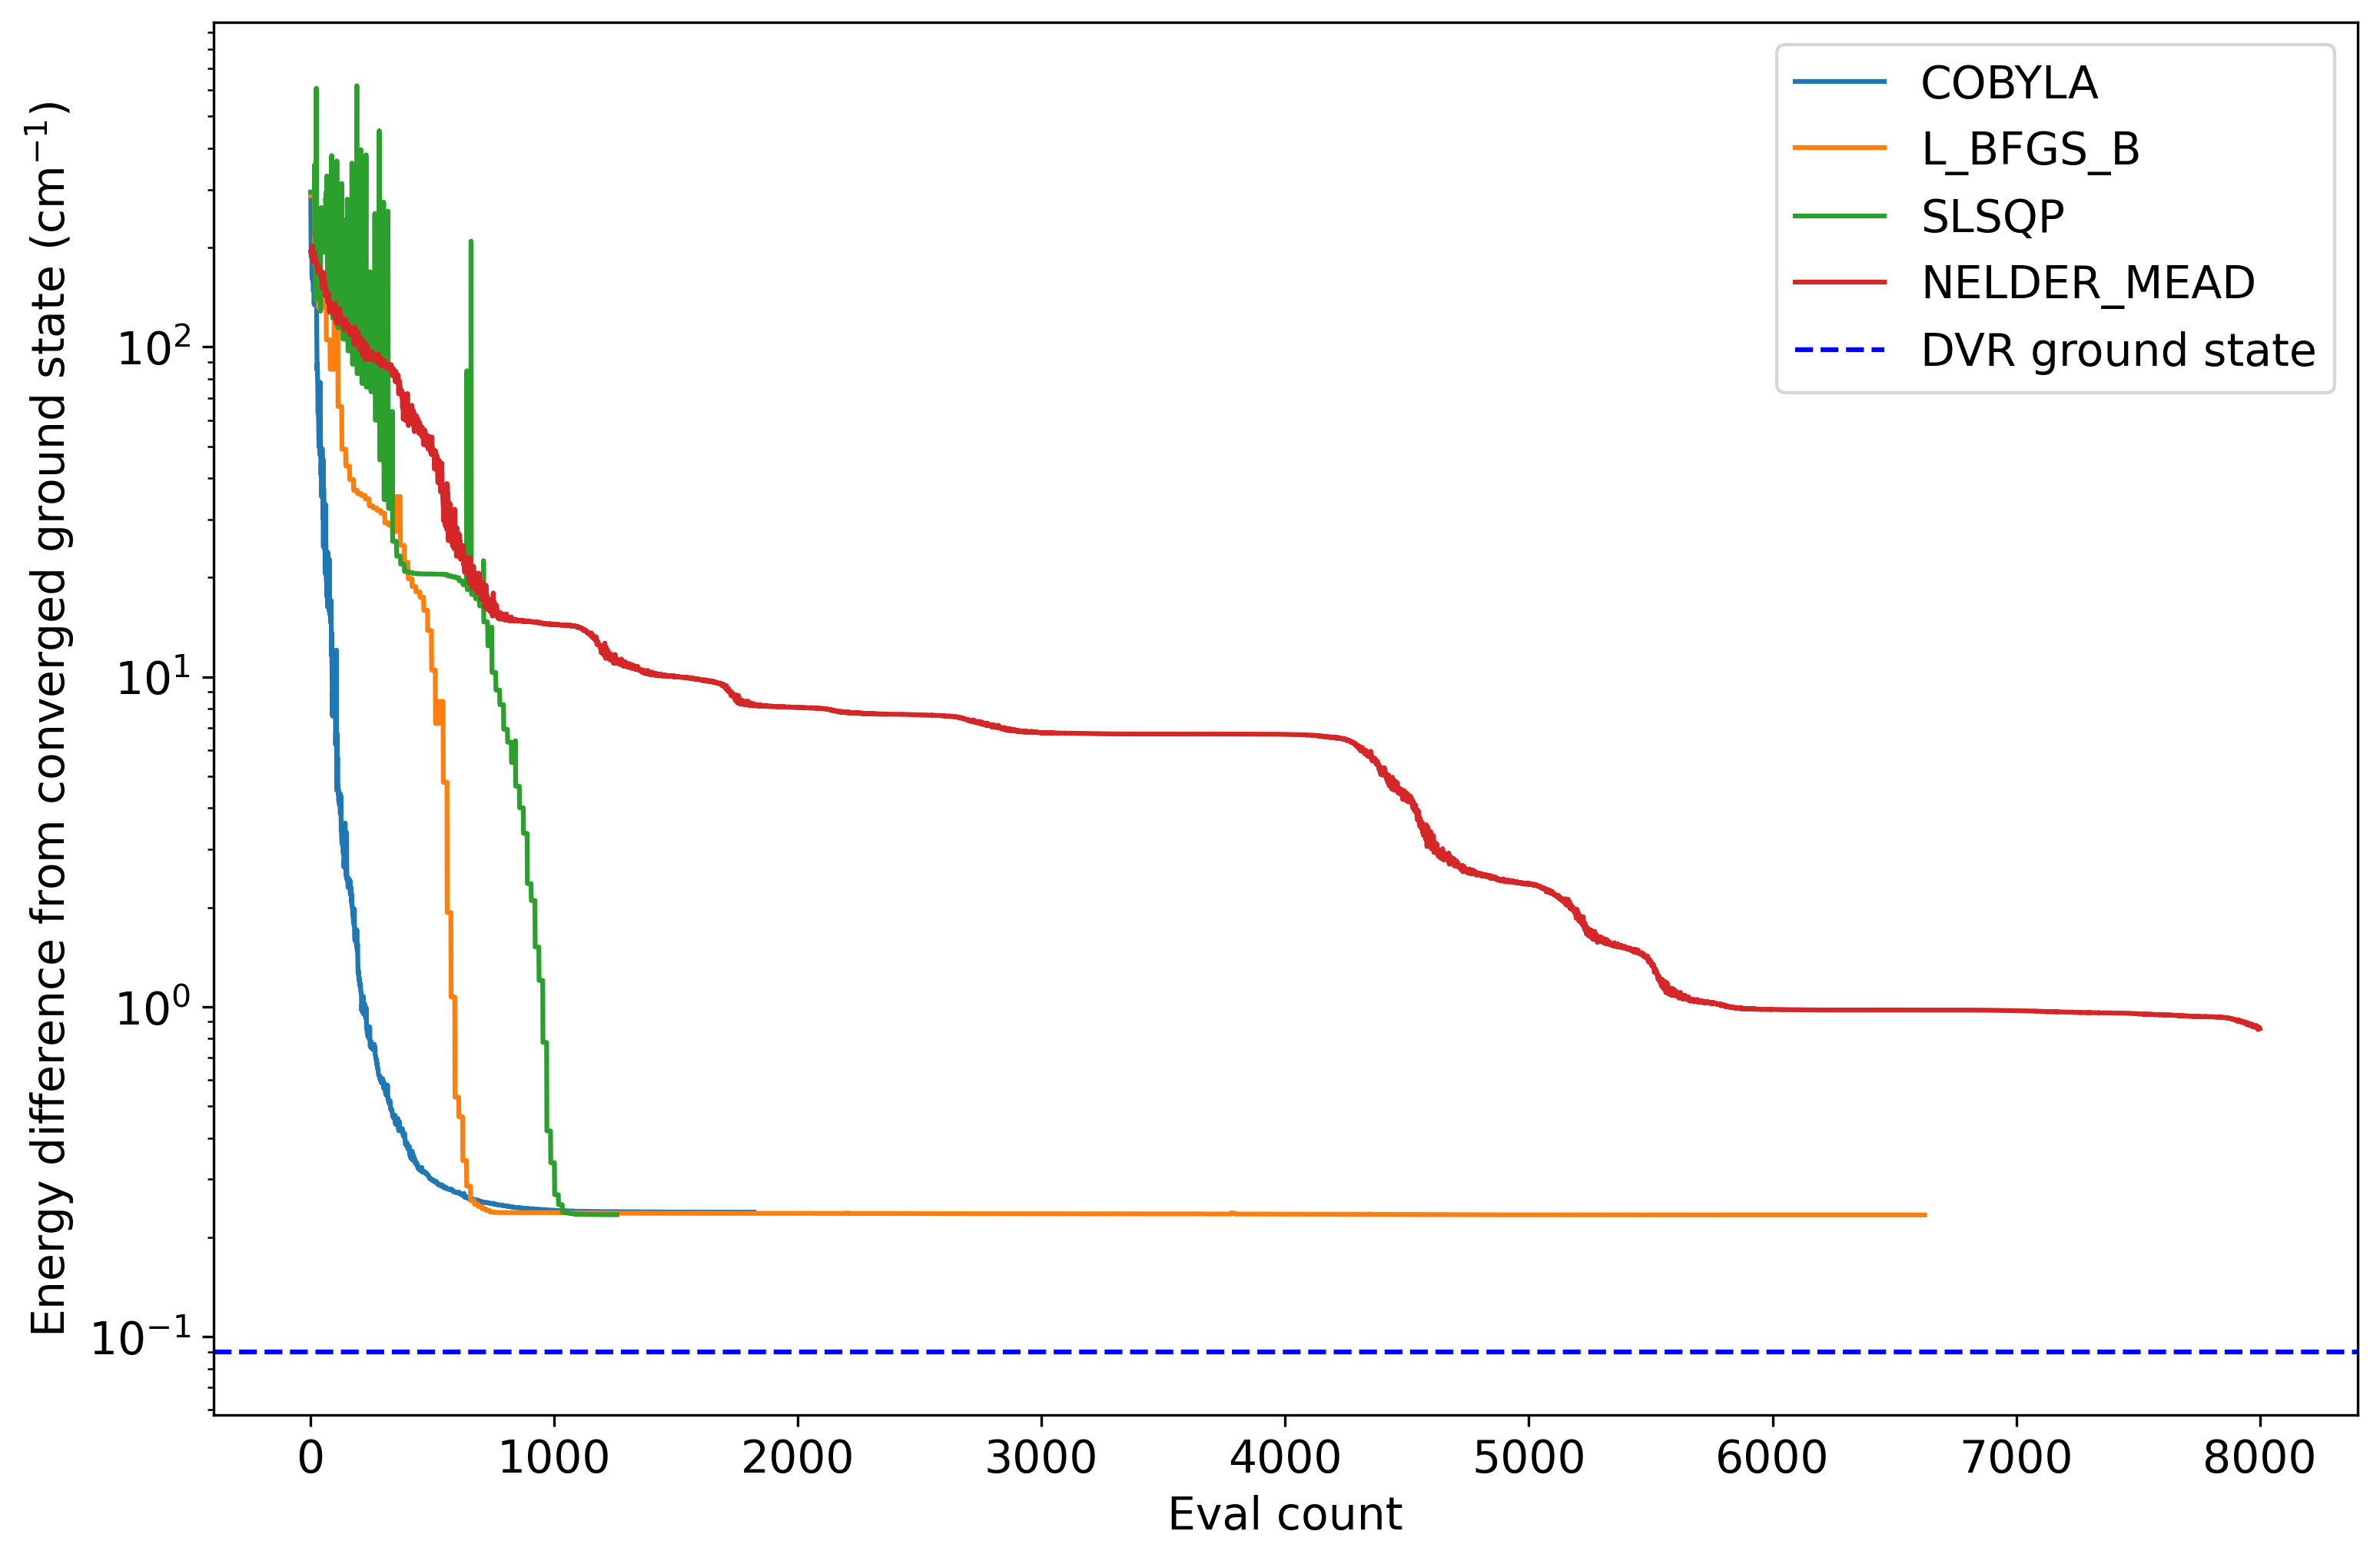

In [18]:
# pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    # pylab.plot(converge_cnts1[i][:], abs(ref - converge_vals1[i][:]), label=type(optimizer).__name__)
    pylab.plot(converge_cnts3[i][:], abs(ref - converge_vals3[i][:]), label=type(optimizer).__name__)
pylab.axhline(abs(ref - eigvals[0]), ls='--', c='blue', label='DVR ground state')
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from converged ground state (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
# plt.ylim(0,1)
pylab.legend(loc='upper right');
# print(abs(ref - converge_vals1[:, -1]))

12


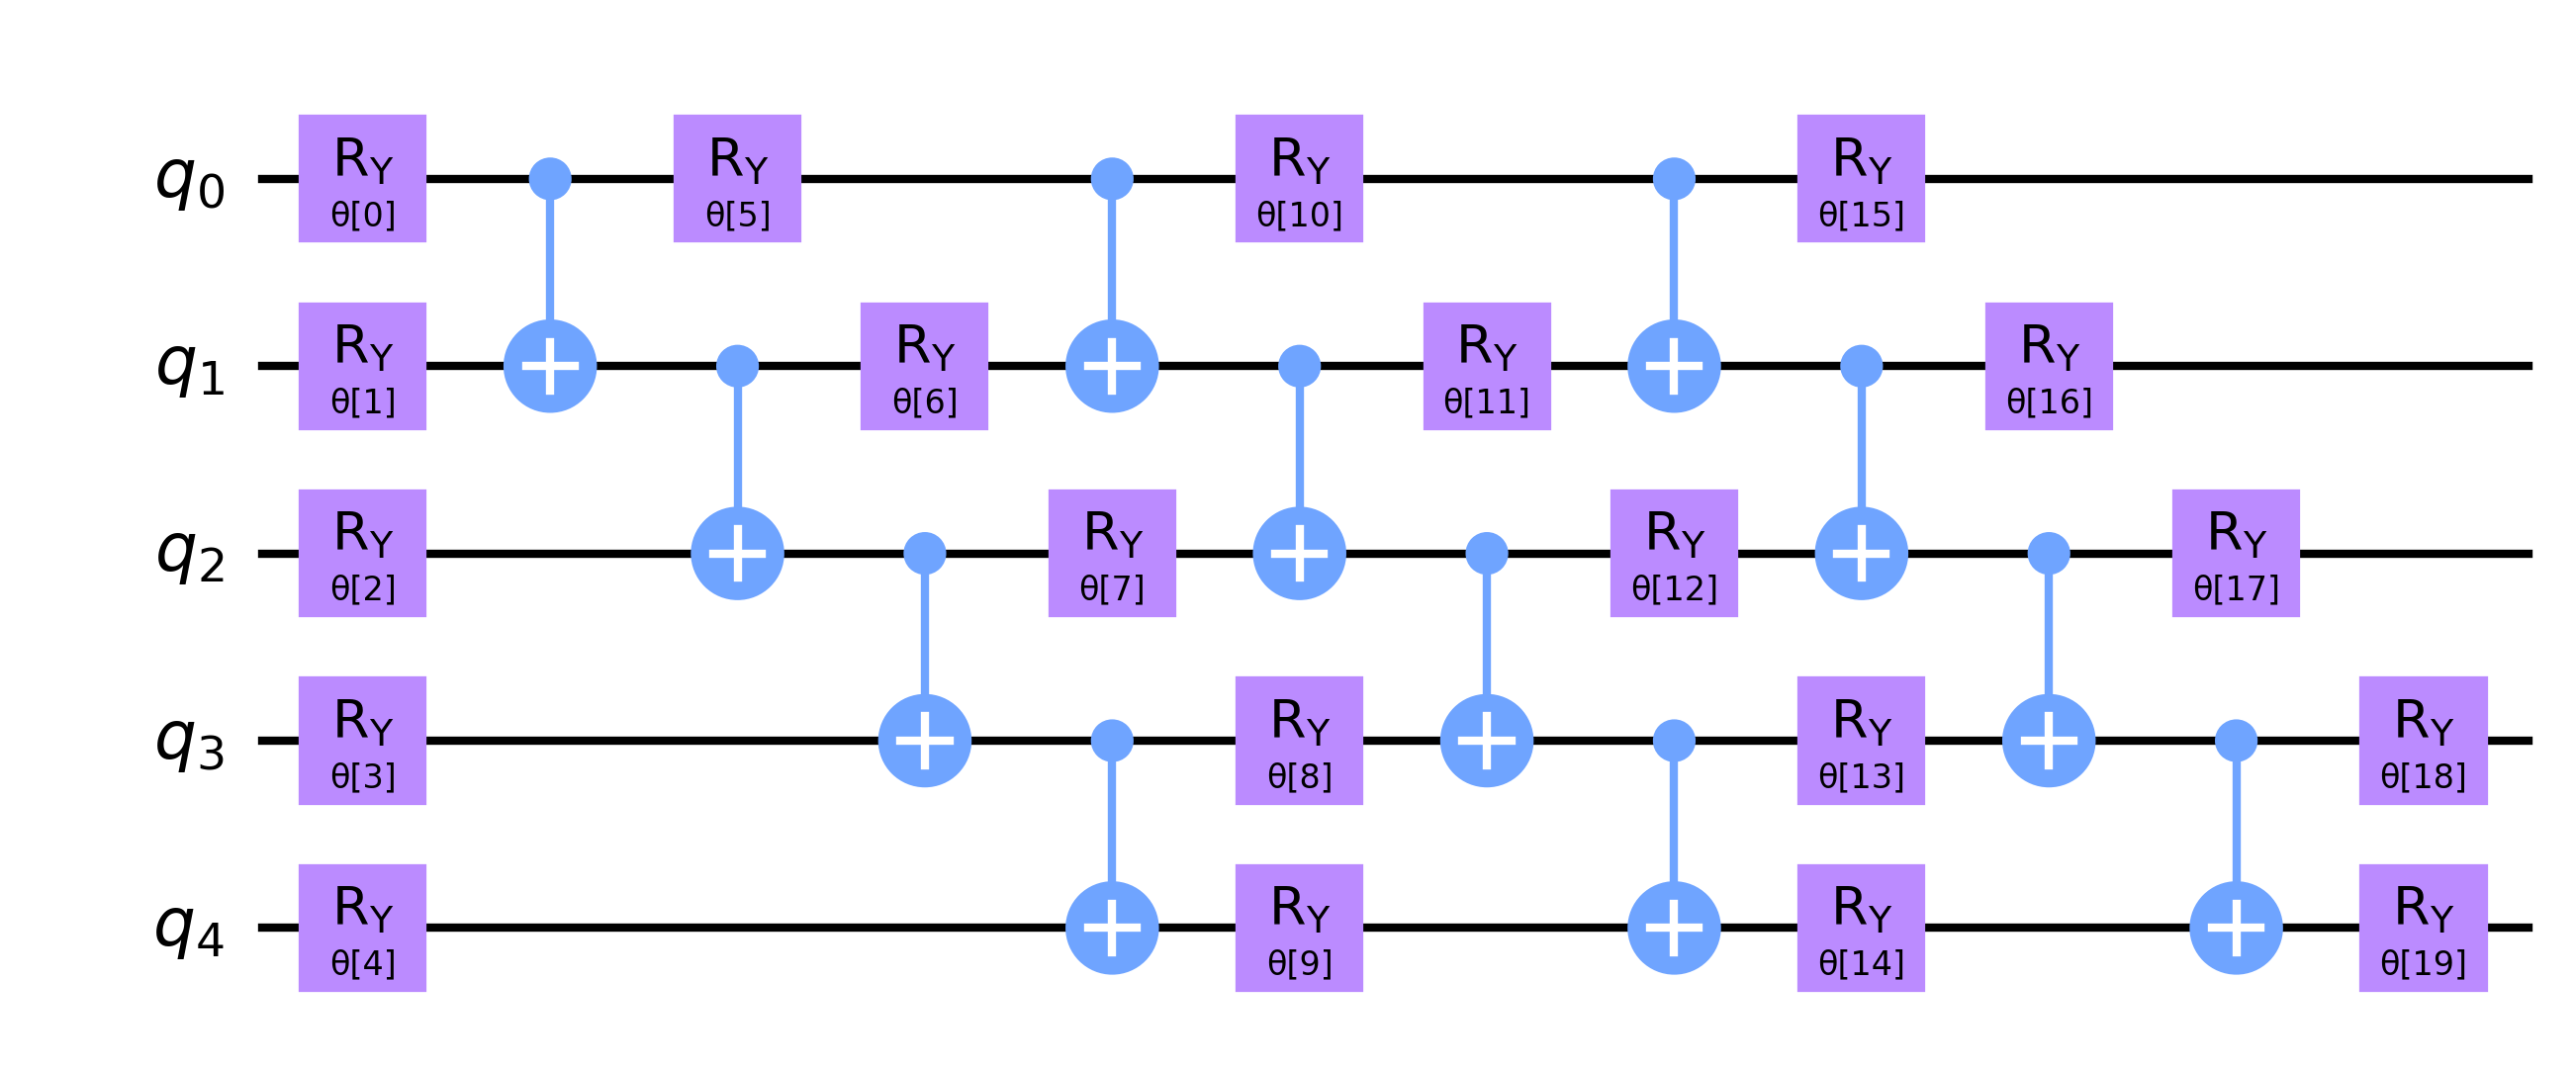

In [7]:
ansatz4 = TwoLocal(5, rotation_blocks=['ry'], entanglement_blocks='cx', entanglement='linear', reps=3).decompose()
print(ansatz4.depth())
ansatz4.draw(output='mpl', fold=-1)

In [8]:
optimizers = [COBYLA(maxiter=8000), L_BFGS_B(maxfun=8000), SLSQP(maxiter=1000), NELDER_MEAD(maxfev=8000)]
# from qiskit.algorithms.optimizers import NELDER_MEAD
# optimizers = [SLSQP(maxiter=600)]
converge_cnts4 = np.empty([len(optimizers)], dtype=object)
converge_vals4 = np.empty([len(optimizers)], dtype=object)

repeat = 3
params = None
# params = np.array([0.0 for i in range(ansatz1.num_parameters)])
for i, optimizer in enumerate(optimizers):
    print('Optimizer: {}        '.format(type(optimizer).__name__))
    algorithm_globals.random_seed = 42

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        print(f'\r{eval_count}, {mean}', end='')
    
    best_res4 = None
    for j in range(repeat):
        counts = []
        values = []
        vqe = VQE(ansatz4, optimizer, callback=store_intermediate_result, initial_point=params, 
                quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
        result = vqe.compute_minimum_eigenvalue(operator=h_dvr_pauli)
        print()

        if (best_res4 is None) or (values[-1] < best_res4):
            best_res4 = values[-1]
            converge_cnts4[i] = np.asarray(counts)
            converge_vals4[i] = np.asarray(values)
print('\nOptimization complete      ')

Optimizer: COBYLA        
8000, -115.08391163669586
6681, -114.08390351483919
8000, -114.07645155423143
Optimizer: L_BFGS_B        
8001, -115.10882098030507
8001, -115.07281969440791
8001, -115.08445723656146
Optimizer: SLSQP        
3036, -115.06633860511826
3140, -115.10849339692345
4709, -115.06750338798251
Optimizer: NELDER_MEAD        
8000, -114.05249421142878
8000, -104.08336455801654
8000, -113.25502268950912

Optimization complete      


COBYLA -115.08391163669586 0.1839729355134665
L_BFGS_B -115.10882098030507 0.1590635919042569
SLSQP -115.10849339692345 0.15939117528587587
NELDER_MEAD -114.0524942114287 1.2153903607806313
0.08991874864881311


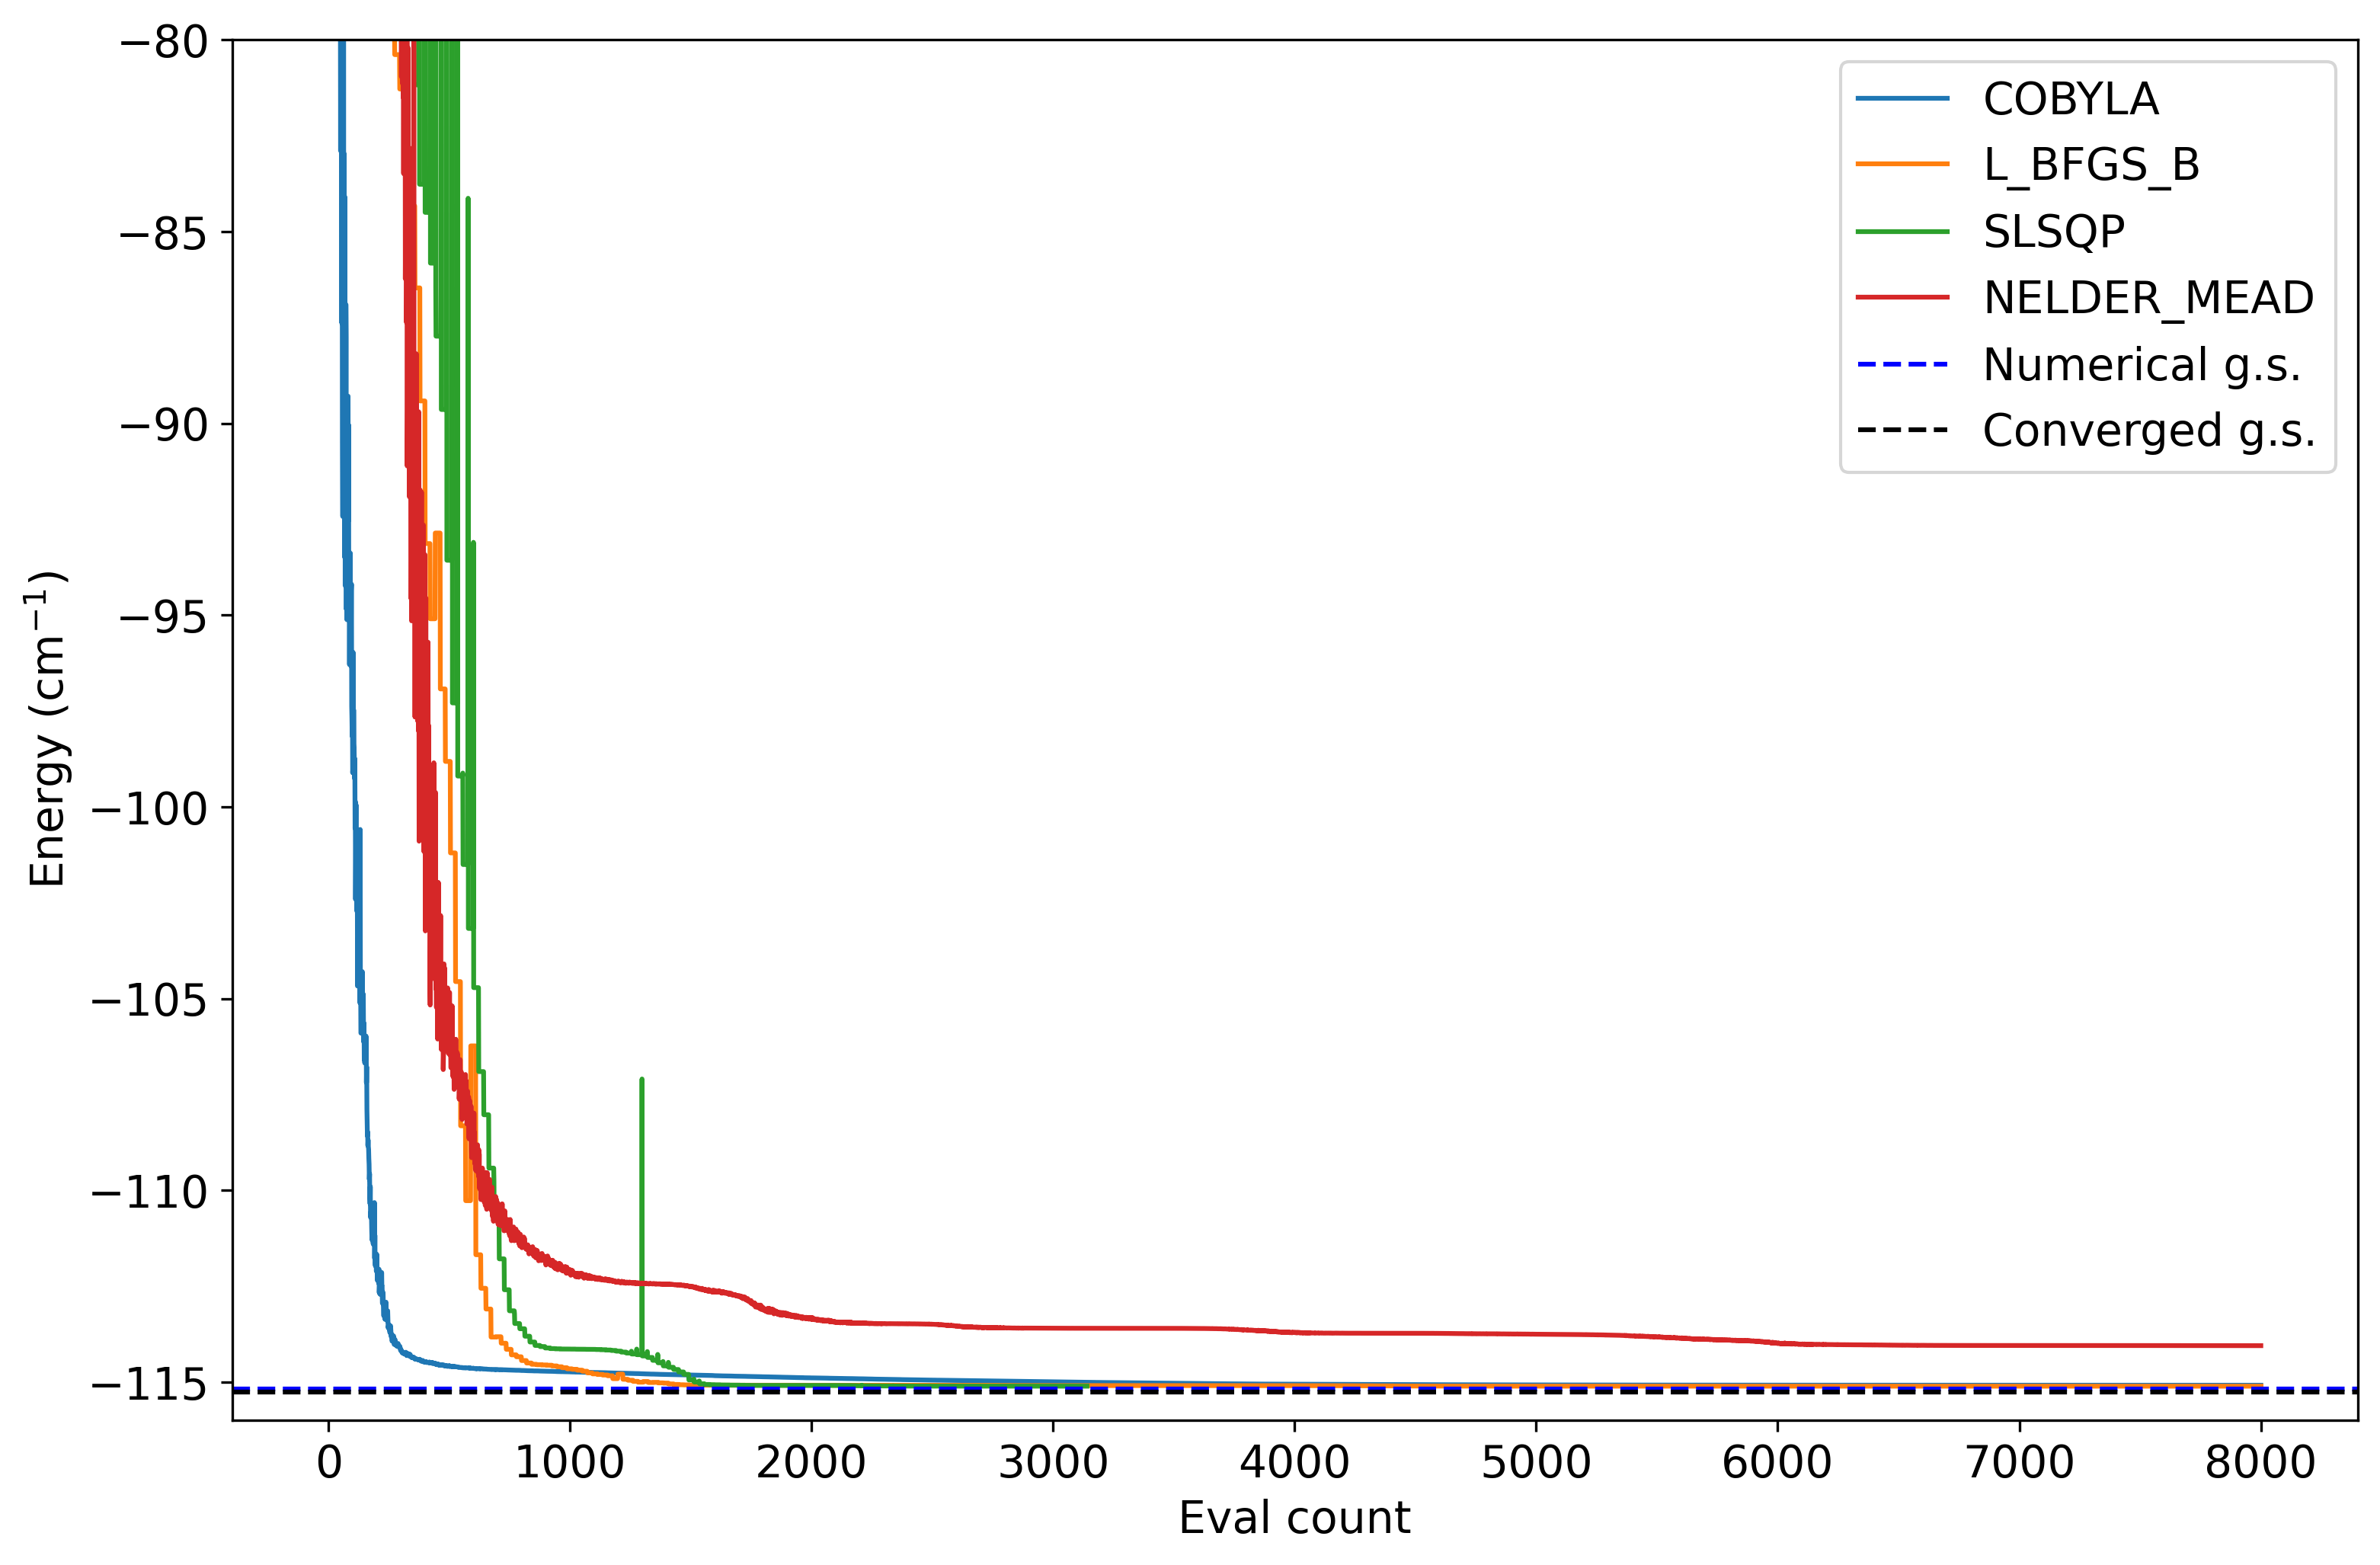

In [9]:
import pylab

ref = -115.26788457220933
# print(converge_cnts4, converge_vals4)
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    print(type(optimizer).__name__, converge_vals4[i][-1], abs(ref - converge_vals4[i][-1]))
    pylab.plot(converge_cnts4[i], converge_vals4[i], label=type(optimizer).__name__)
# pylab.axhline(eigvals[0])

print(abs(ref - eigvals[0]))
pylab.axhline(eigvals[0], ls='--', c='blue', label='Numerical g.s.')
pylab.axhline(ref, ls='--', c='black', label='Converged g.s.')
pylab.xlabel('Eval count')
pylab.ylabel('Energy (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
# pylab.xlim(800, 1000)
pylab.ylim(-116, -80)
pylab.legend(loc='upper right');

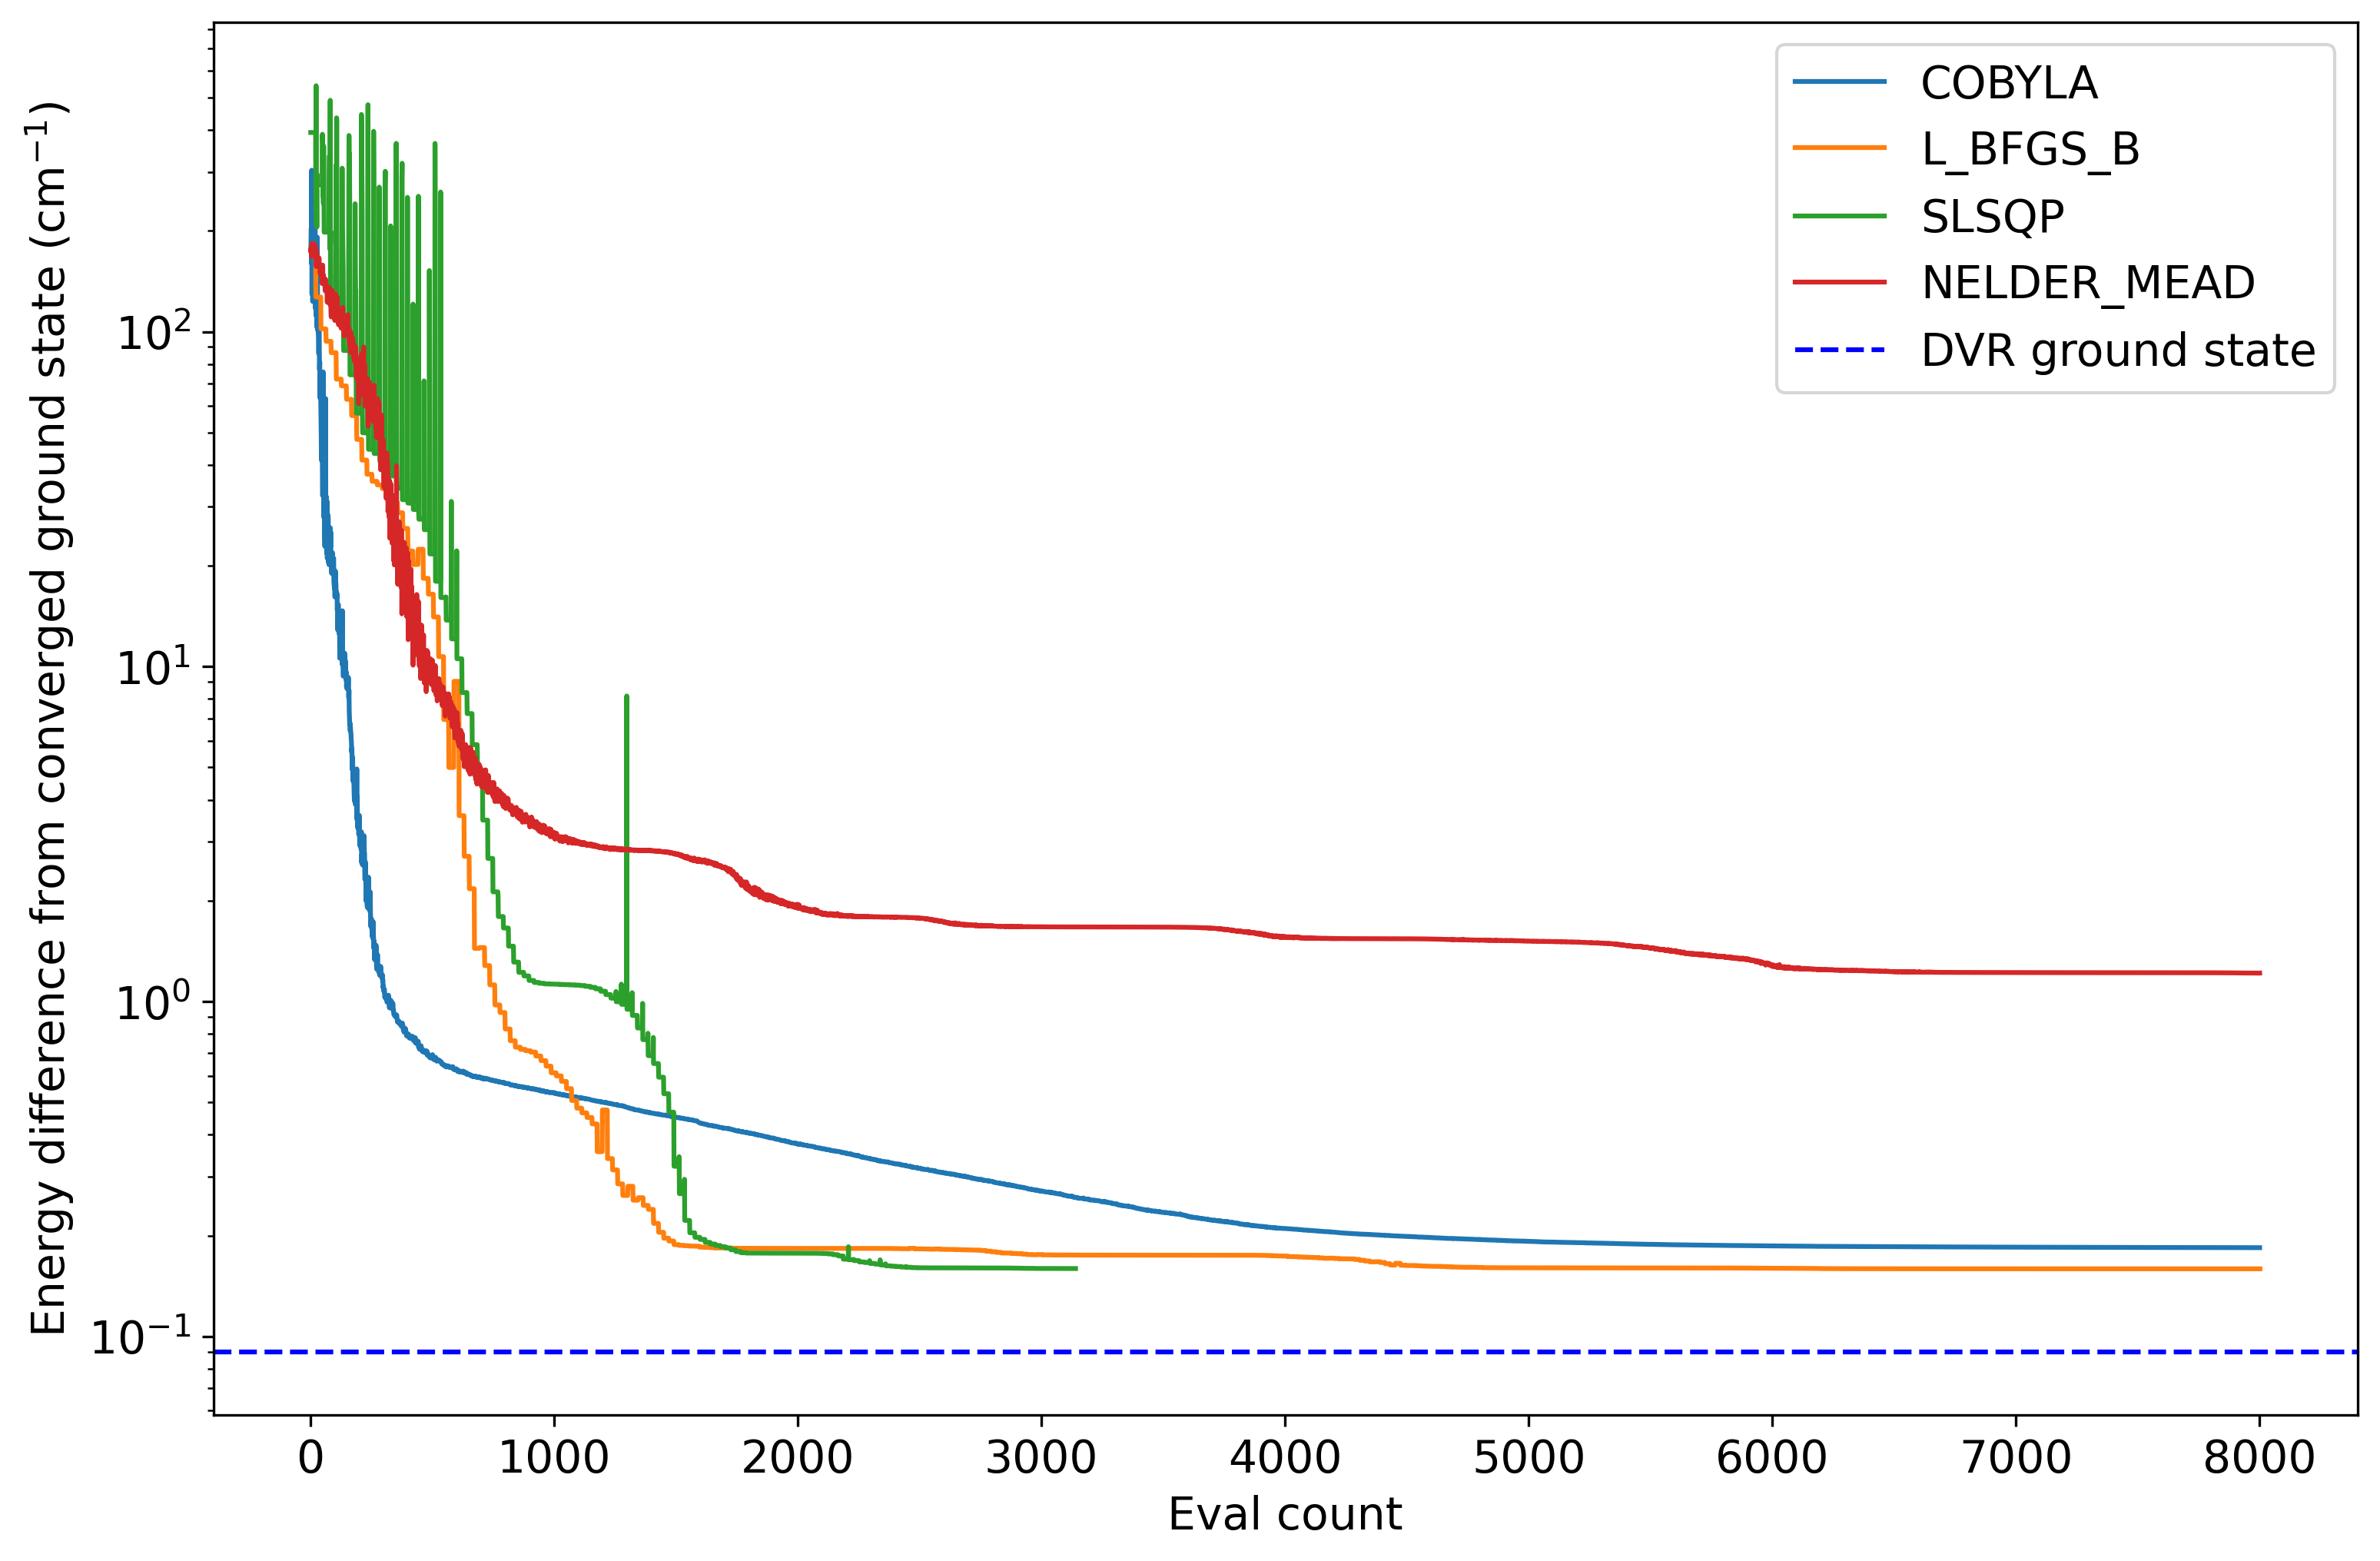

In [11]:
# pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    # pylab.plot(converge_cnts1[i][:], abs(ref - converge_vals1[i][:]), label=type(optimizer).__name__)
    pylab.plot(converge_cnts4[i][:], abs(ref - converge_vals4[i][:]), label=type(optimizer).__name__)
pylab.axhline(abs(ref - eigvals[0]), ls='--', c='blue', label='DVR ground state')
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from converged ground state (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
# plt.ylim(0,1)
pylab.legend(loc='upper right');
# print(abs(ref - converge_vals1[:, -1]))

15


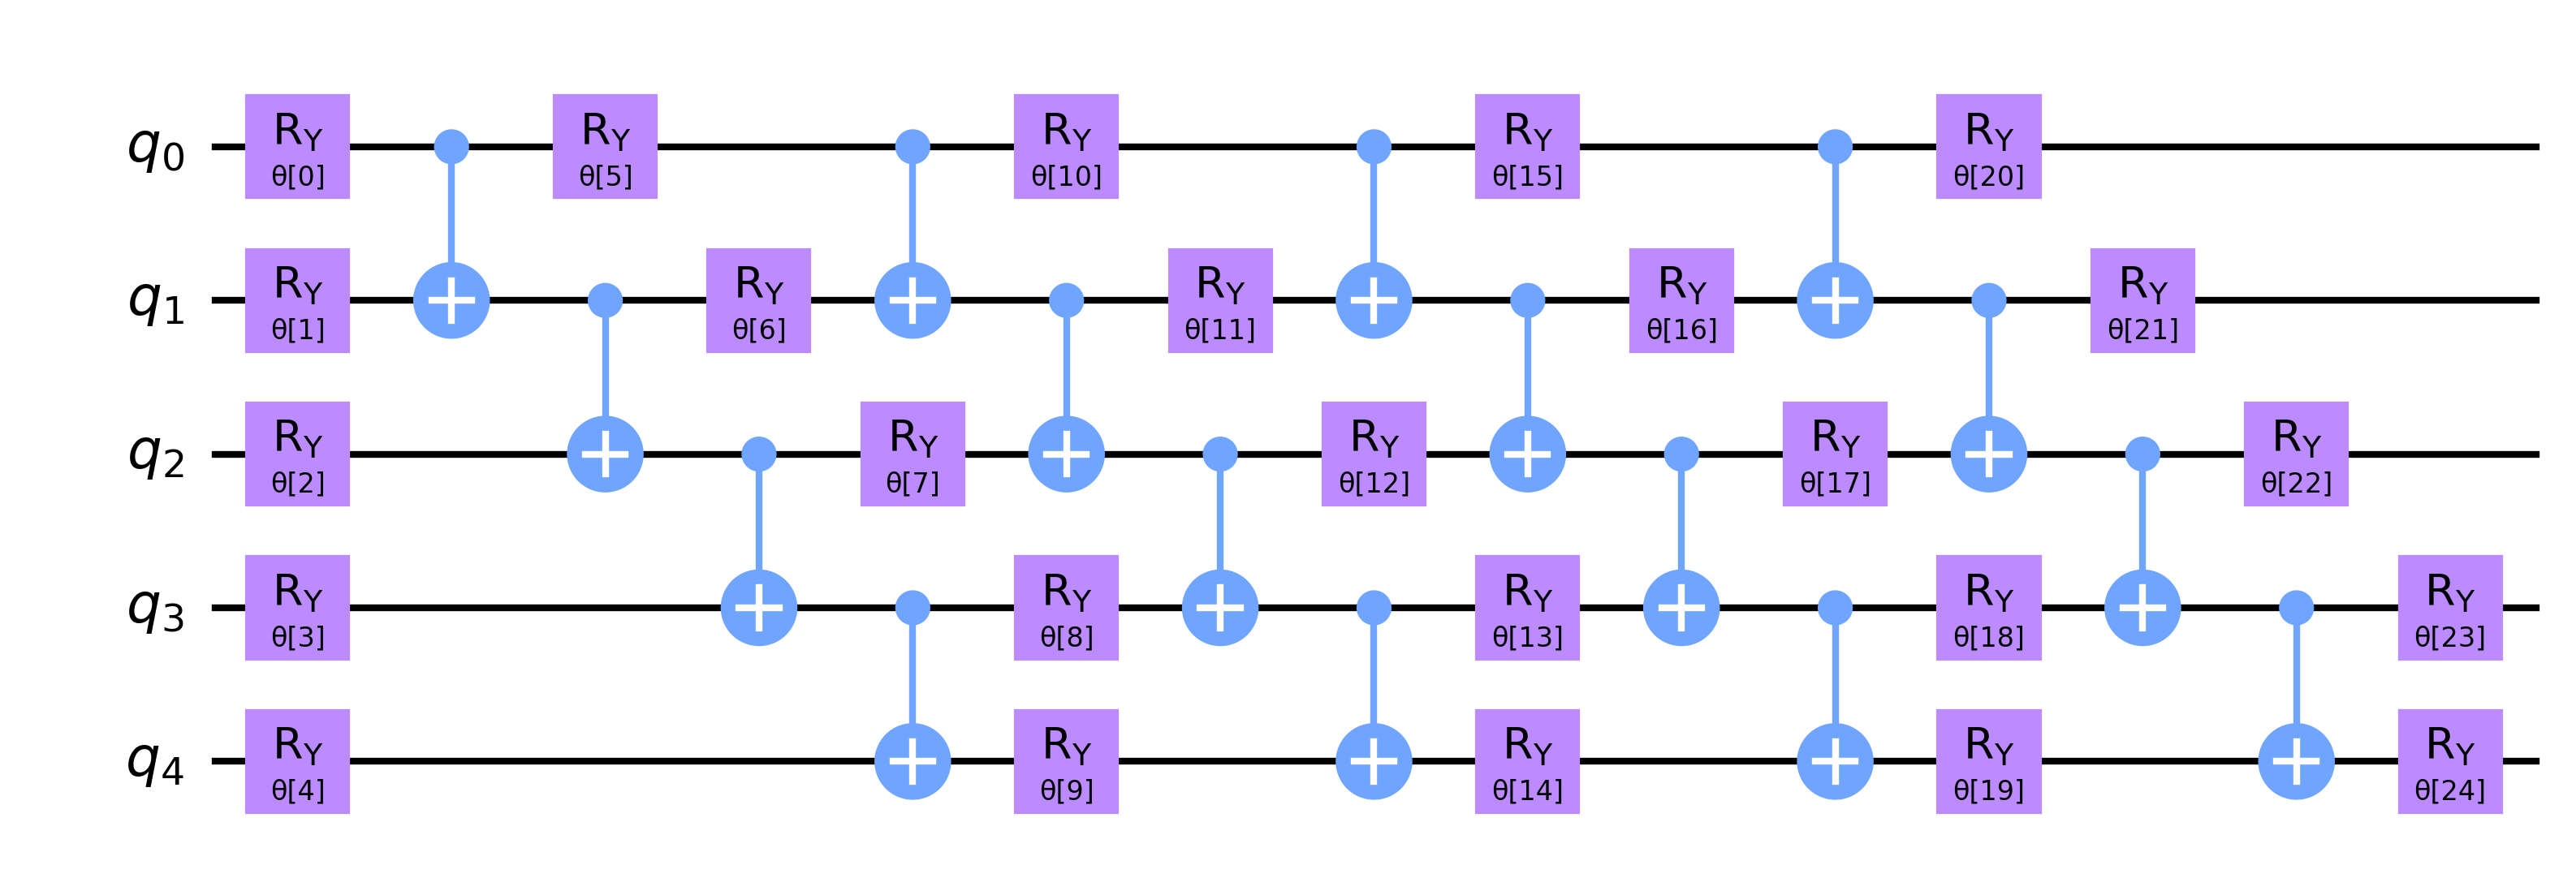

In [12]:
ansatz5 = TwoLocal(5, rotation_blocks=['ry'], entanglement_blocks='cx', entanglement='linear', reps=4).decompose()
print(ansatz5.depth())
ansatz5.draw(output='mpl', fold=-1)

In [13]:
optimizers = [COBYLA(maxiter=8000), L_BFGS_B(maxfun=8000), SLSQP(maxiter=1000), NELDER_MEAD(maxfev=8000)]
# from qiskit.algorithms.optimizers import NELDER_MEAD
# optimizers = [SLSQP(maxiter=600)]
converge_cnts5 = np.empty([len(optimizers)], dtype=object)
converge_vals5 = np.empty([len(optimizers)], dtype=object)

repeat = 3
params = None
# params = np.array([0.0 for i in range(ansatz1.num_parameters)])
for i, optimizer in enumerate(optimizers):
    print('Optimizer: {}        '.format(type(optimizer).__name__))
    algorithm_globals.random_seed = 42

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        print(f'\r{eval_count}, {mean}', end='')
    
    best_res5 = None
    for j in range(repeat):
        counts = []
        values = []
        vqe = VQE(ansatz5, optimizer, callback=store_intermediate_result, initial_point=params, 
                quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
        result = vqe.compute_minimum_eigenvalue(operator=h_dvr_pauli)
        print()

        if (best_res5 is None) or (values[-1] < best_res5):
            best_res5 = values[-1]
            converge_cnts5[i] = np.asarray(counts)
            converge_vals5[i] = np.asarray(values)
print('\nOptimization complete      ')

Optimizer: COBYLA        
8000, -115.04545798015494
8000, -115.10526932927561
8000, -115.04889718621415
Optimizer: L_BFGS_B        
8008, -115.10715427966628
8008, -115.11052172519854
8034, -115.15661066890486
Optimizer: SLSQP        
2252, -115.10863129630937
4188, -115.05818203998705
7166, -115.08053541734128
Optimizer: NELDER_MEAD        
8000, -114.43894439489715
8000, -115.05448984723667
8000, -114.47680101383203

Optimization complete      


COBYLA -115.10526932927561 0.1626152429337111
L_BFGS_B -115.1566106689048 0.11127390330452158
SLSQP -115.10863129630937 0.15925327589995675
NELDER_MEAD -115.05448984723667 0.21339472497265888
0.08991874864881311


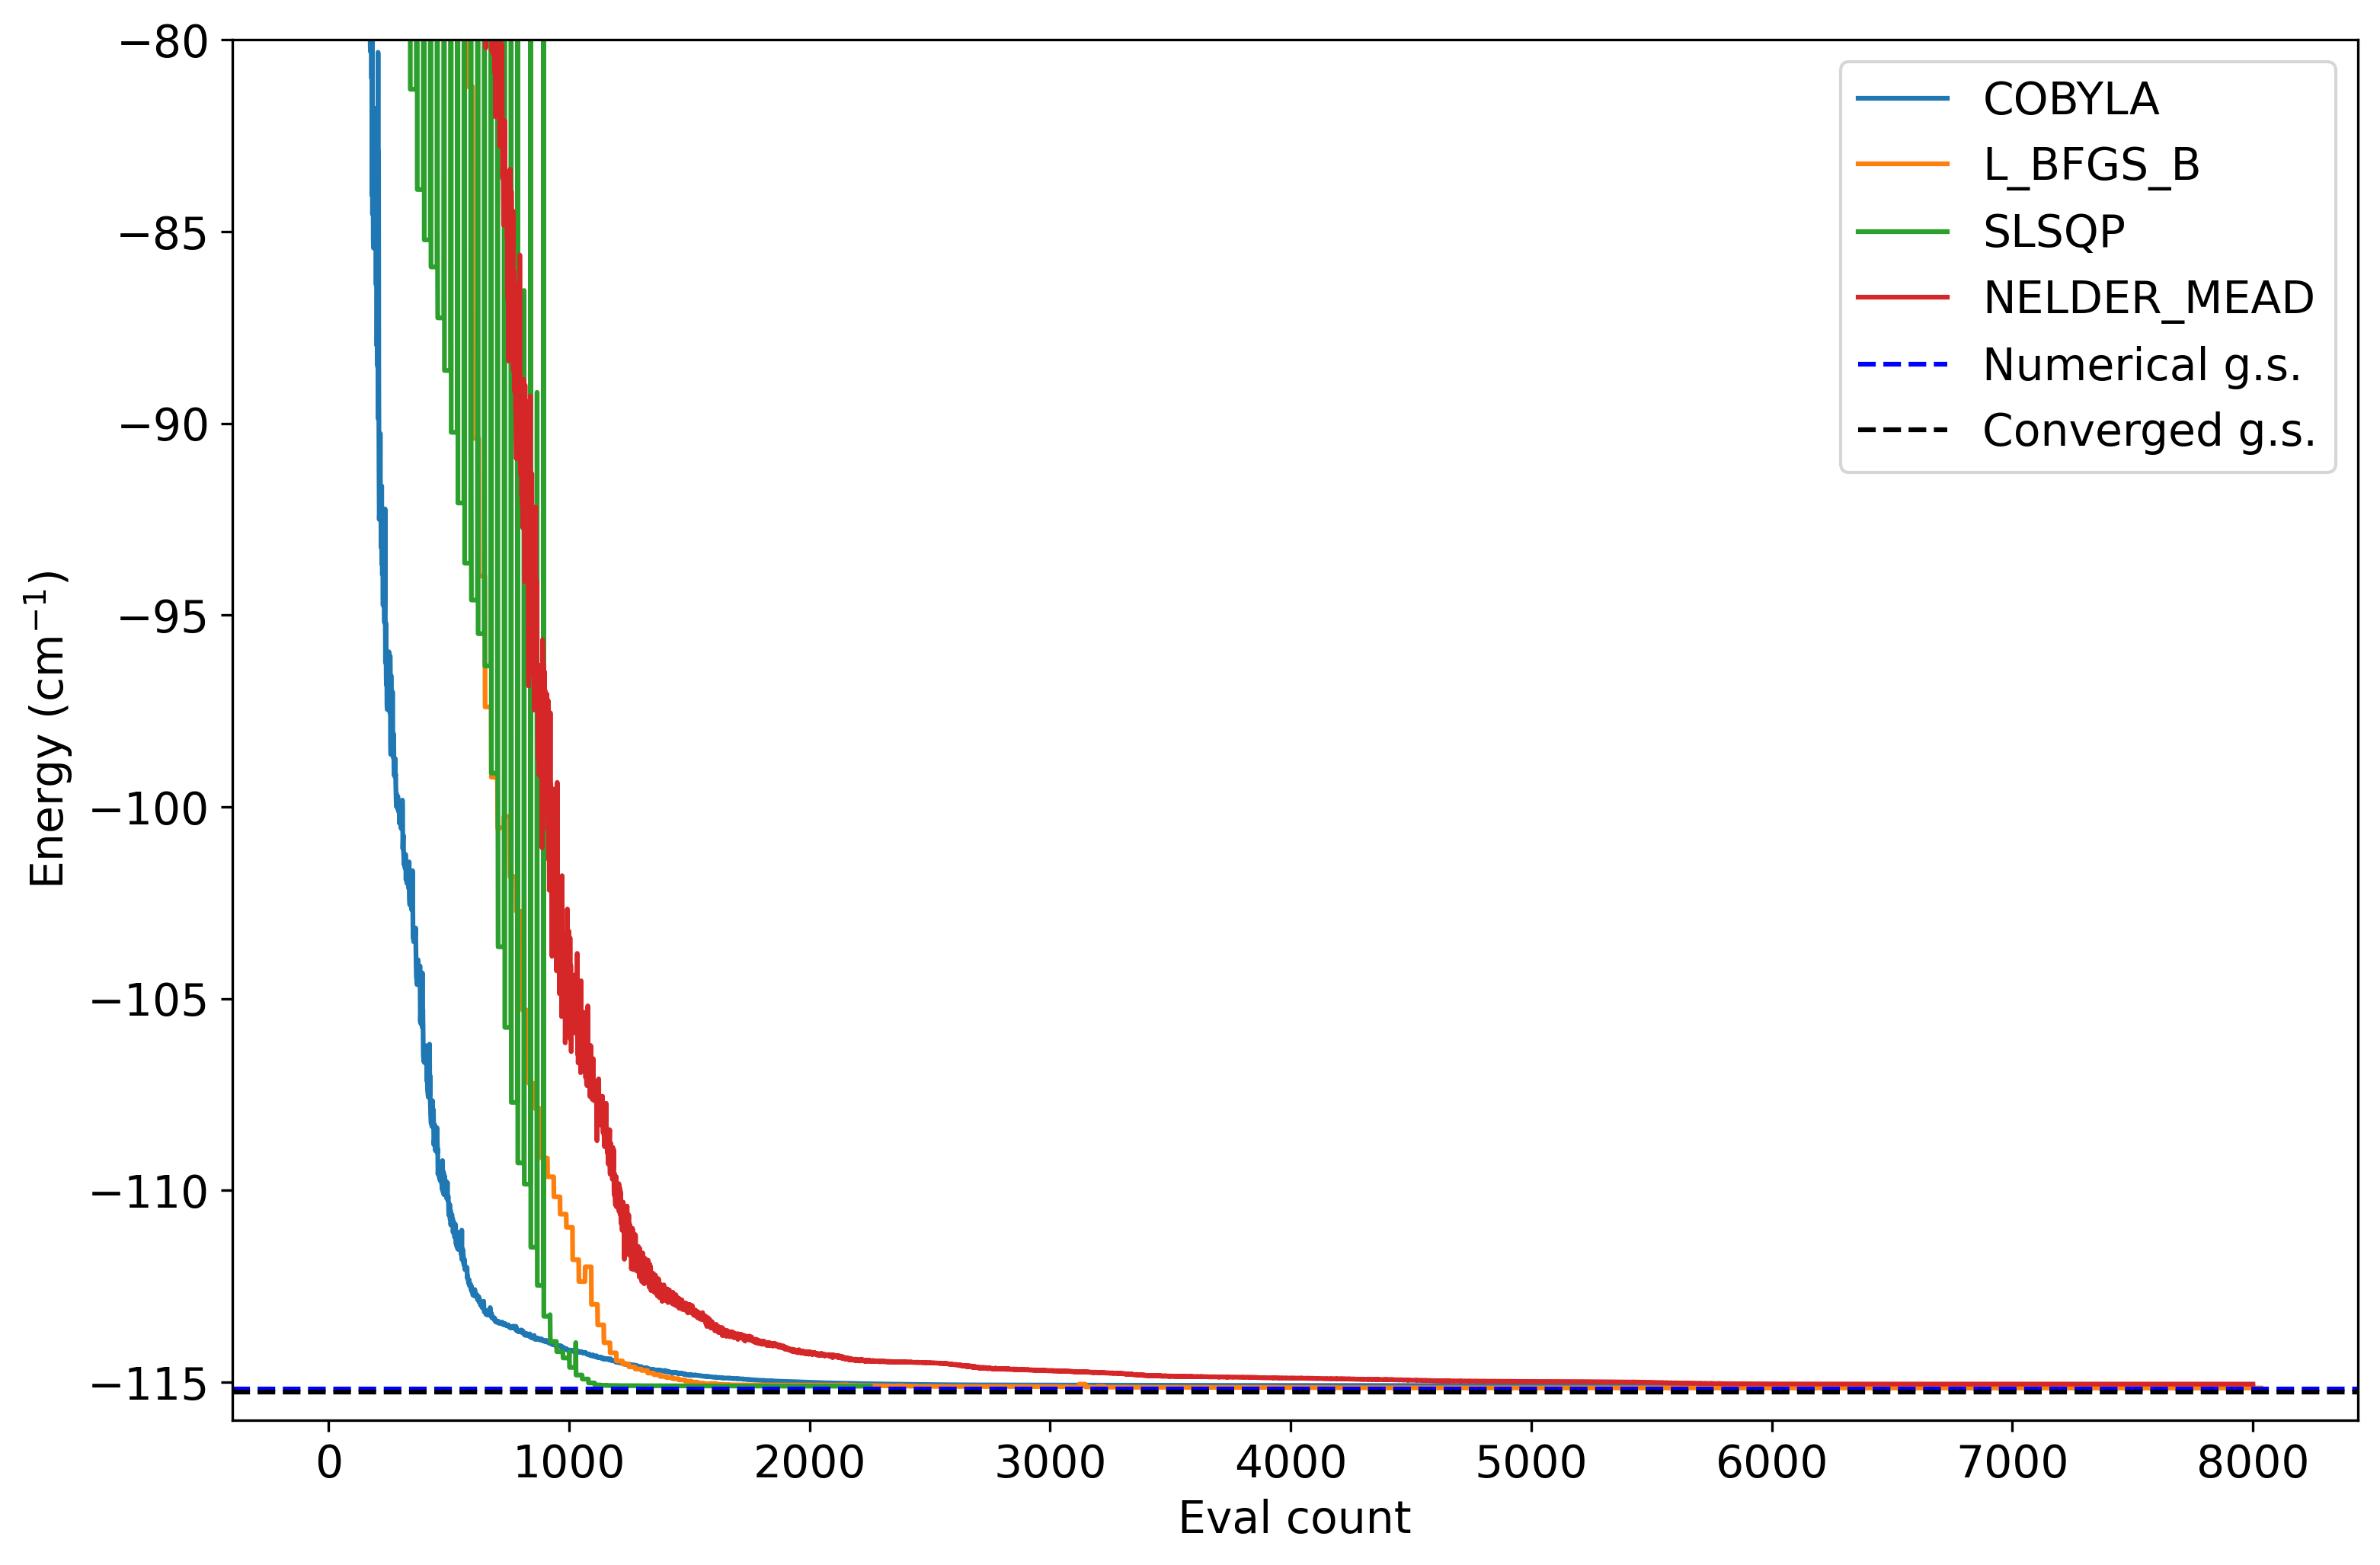

In [15]:
import pylab

ref = -115.26788457220933
# print(converge_cnts4, converge_vals4)
pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    print(type(optimizer).__name__, converge_vals5[i][-1], abs(ref - converge_vals5[i][-1]))
    pylab.plot(converge_cnts5[i], converge_vals5[i], label=type(optimizer).__name__)
# pylab.axhline(eigvals[0])

print(abs(ref - eigvals[0]))
pylab.axhline(eigvals[0], ls='--', c='blue', label='Numerical g.s.')
pylab.axhline(ref, ls='--', c='black', label='Converged g.s.')
pylab.xlabel('Eval count')
pylab.ylabel('Energy (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
# pylab.xlim(800, 1000)
pylab.ylim(-116, -80)
pylab.legend(loc='upper right');

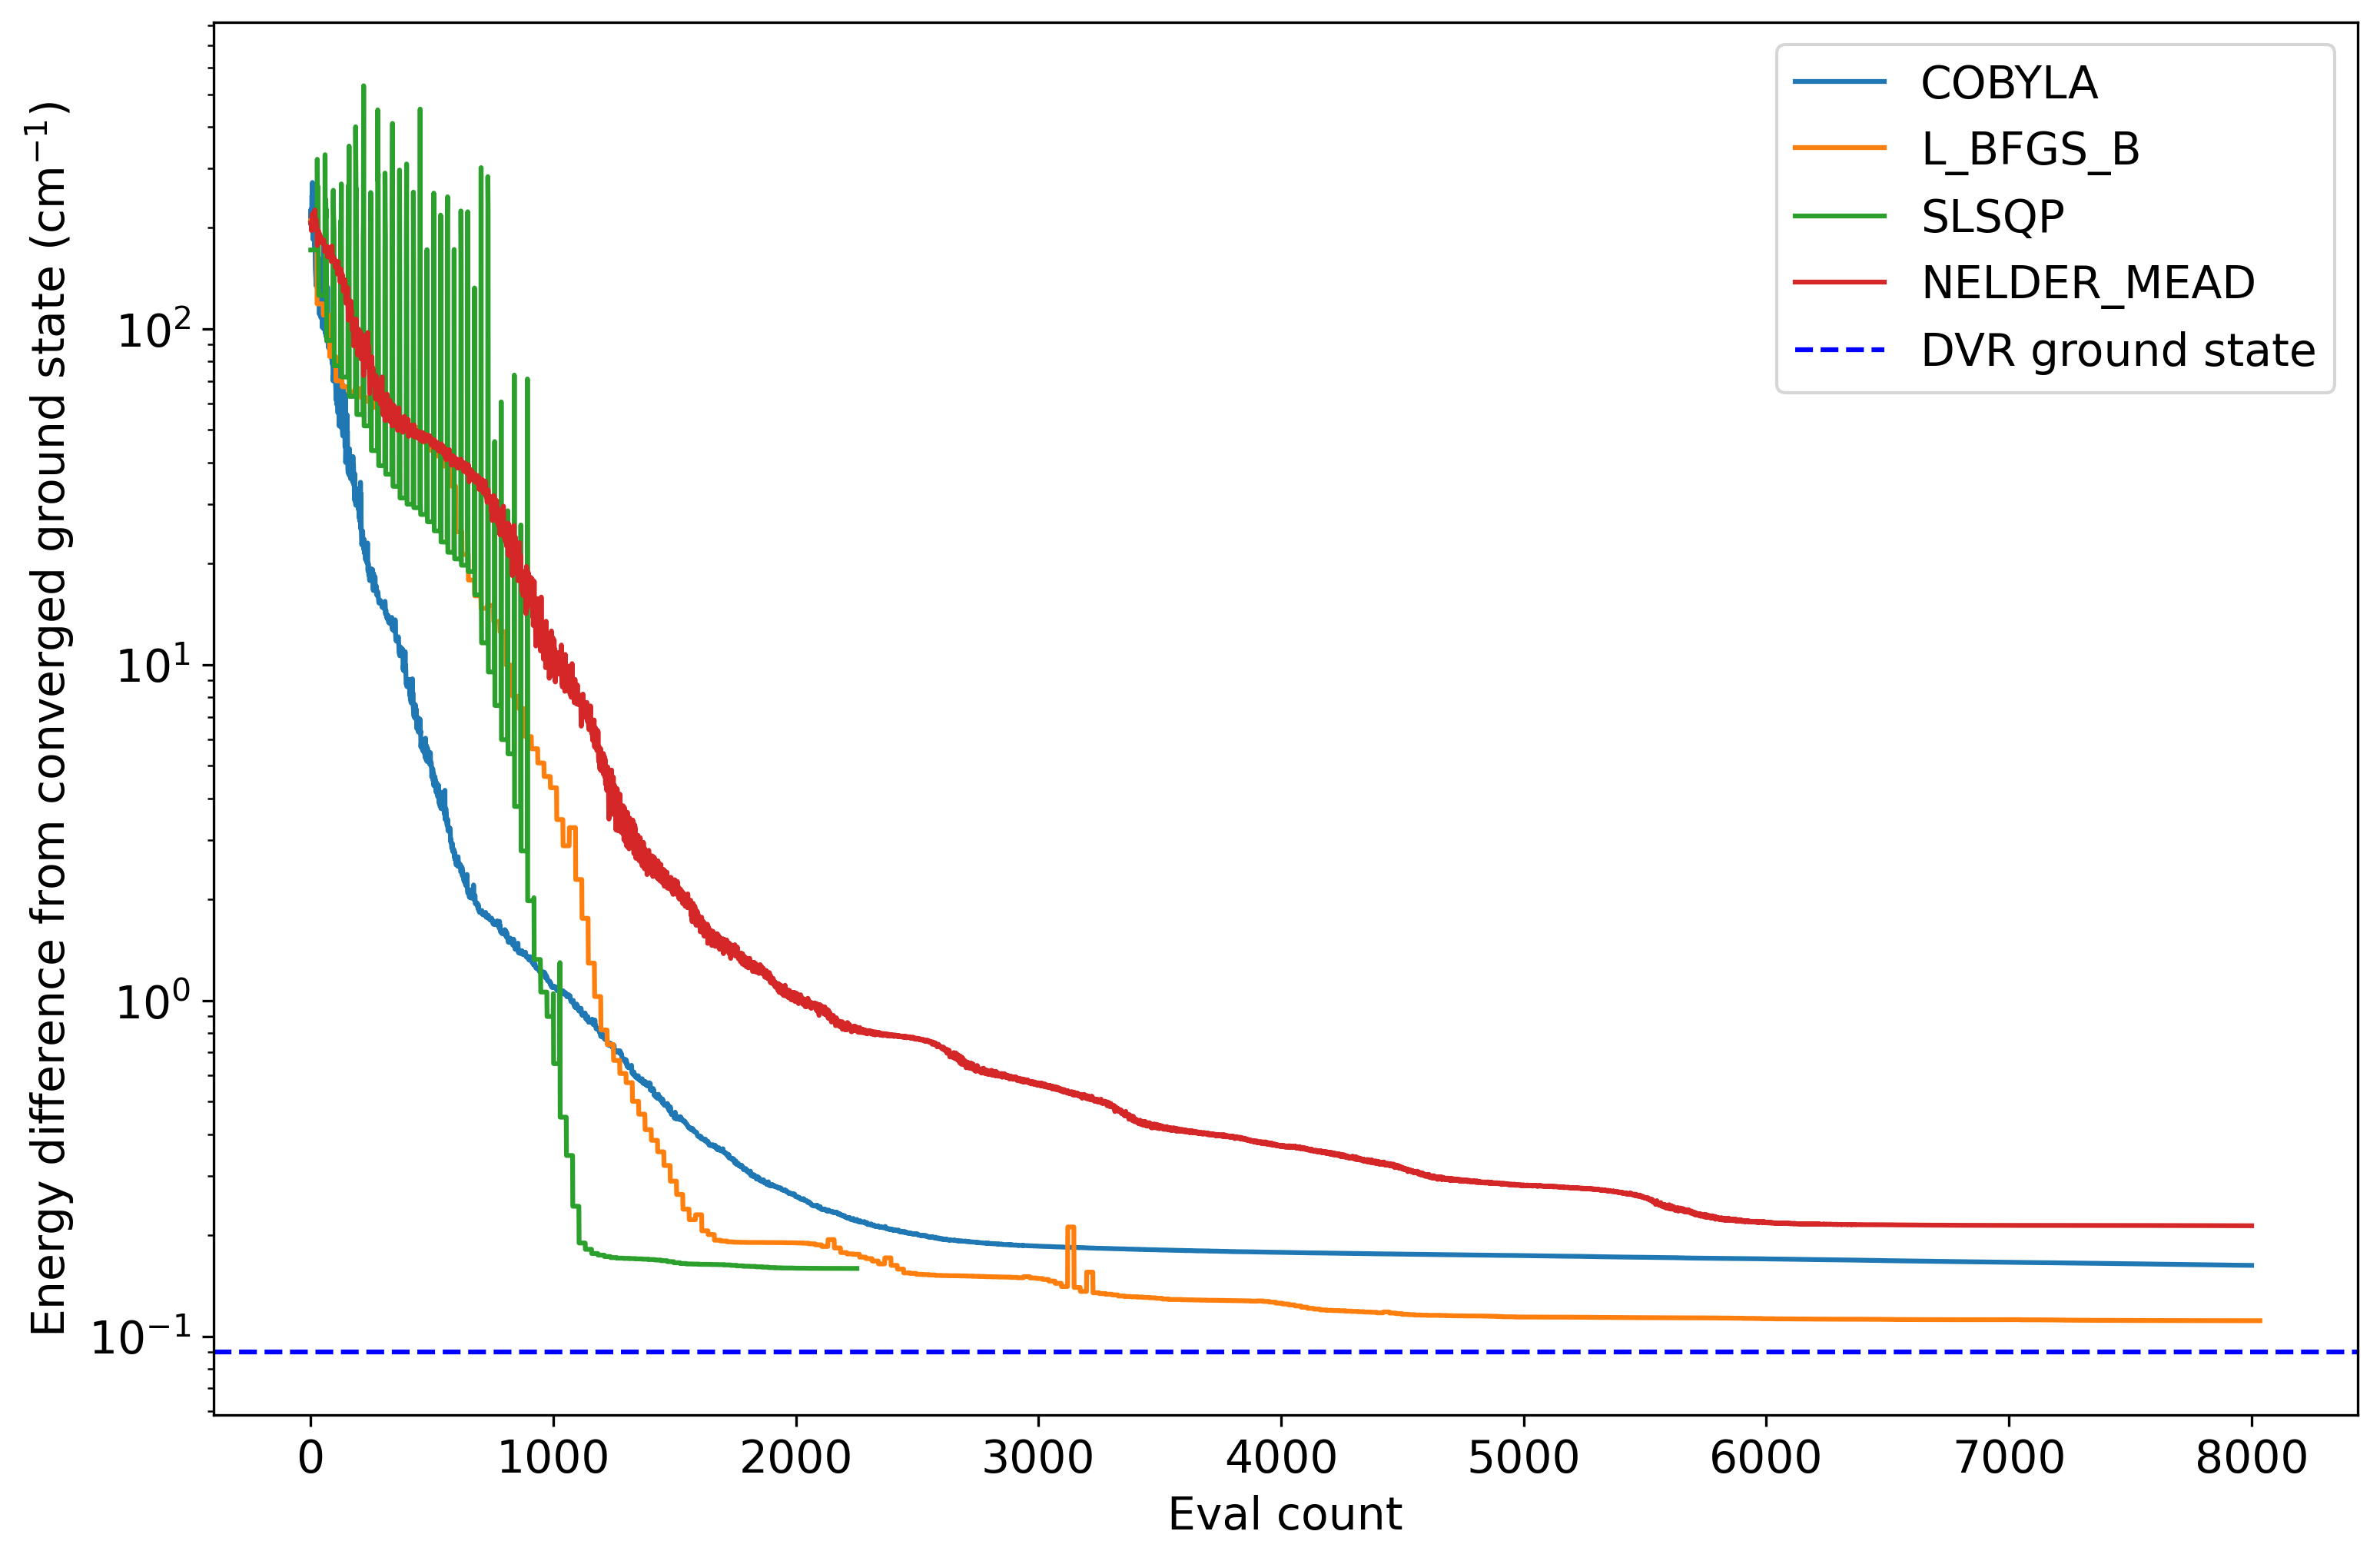

In [18]:
# pylab.rcParams['figure.figsize'] = (12, 8)
for i, optimizer in enumerate(optimizers):
    # pylab.plot(converge_cnts1[i][:], abs(ref - converge_vals1[i][:]), label=type(optimizer).__name__)
    pylab.plot(converge_cnts5[i][:], abs(ref - converge_vals5[i][:]), label=type(optimizer).__name__)
pylab.axhline(abs(ref - eigvals[0]), ls='--', c='blue', label='DVR ground state')
pylab.xlabel('Eval count')
pylab.ylabel('Energy difference from converged ground state (cm$^{-1}$)')
# pylab.title('Energy convergence for various optimizers')
pylab.yscale('log')
# plt.ylim(0,1)
pylab.legend(loc='upper right');
# print(abs(ref - converge_vals1[:, -1]))

[3.46947645 3.56275227 3.68968871 3.85075902 4.04631668 4.27674887
 4.54250574 4.84411195]
(8,)
(64, 64)
(64, 64)
-115.17796582356046 [-0.00683351 -0.02164301  0.04891693 -0.07313988 -0.06500382  0.03045261
 -0.00734389 -0.00074949  0.00666572  0.02471542 -0.06923657  0.12880097
  0.1354306  -0.07065164  0.01735824  0.00191214 -0.0117643  -0.0467119
  0.14459053 -0.2985574  -0.33356633  0.17389686 -0.03957321 -0.00418698
  0.00965996  0.04875594 -0.192528    0.47619306  0.57331354 -0.2943692
  0.06105518  0.00618515  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
-115.06547515252528 [-6.82559989e-03 -2.16203855e-02  4.88759962e-02 -7.31016944e-02
 -6.49961131e-02  3.04647358e-02 -7.3510964

<BarContainer object of 64 artists>

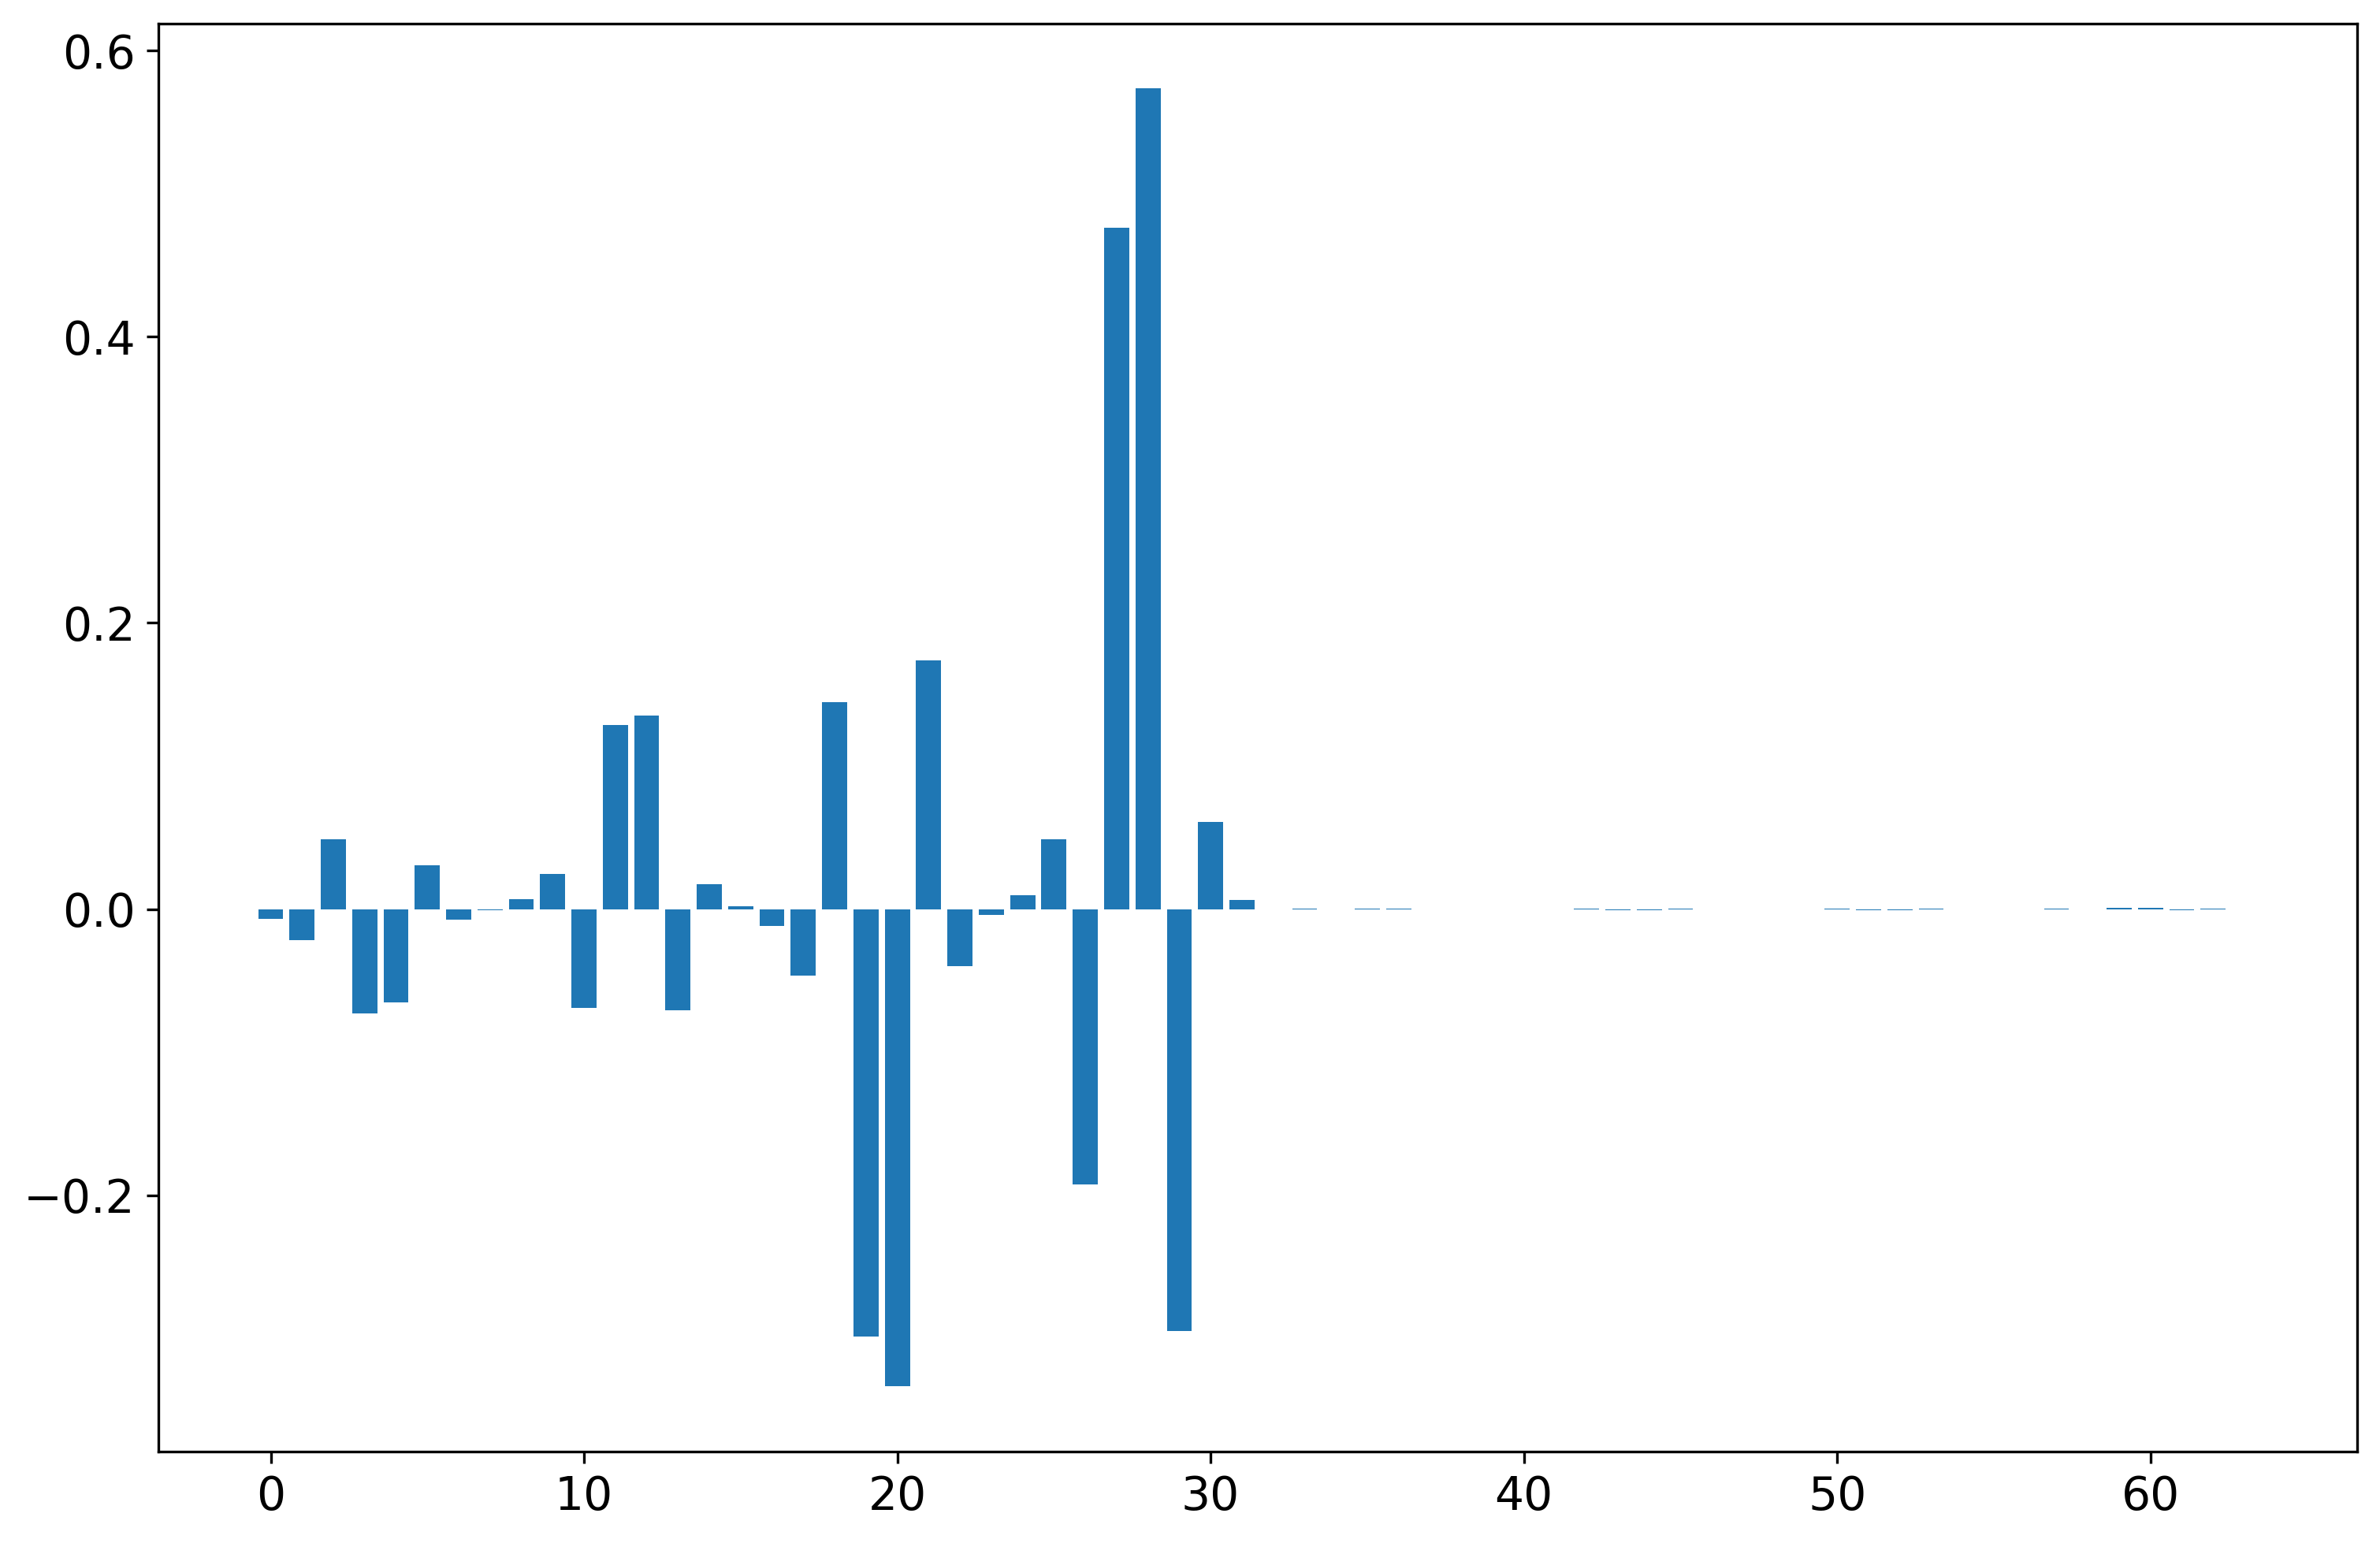

In [24]:
%autoreload
N_R = 35
N_theta = 4
l = 1
K_max = 1
r_min = 3.4
r_max = 5

Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, K_max, l=l, r_min=r_min, r_max=r_max)
Rs_angs = Rs_DVR * arhcl_params['S'] * au_to_angs
print(Rs_angs)
print(Rs_angs.shape)
N_R_lim = Rs_angs.shape[0]

h_dvr0 = get_ham_DVR(pot2d, N_R, N_theta, 0, K_max, l=l, r_min=r_min, r_max=r_max, trunc=0) * hartree
h_dvr1 = get_ham_DVR(pot2d, N_R, N_theta, 1, K_max, l=l, r_min=r_min, r_max=r_max, trunc=0) * hartree
print(h_dvr0.shape)
print(h_dvr1.shape)
eigvals0, eigvecs0 = np.linalg.eigh(h_dvr0)
eigvals1, eigvecs1 = np.linalg.eigh(h_dvr1)
print(eigvals0[0], eigvecs0.T[0])
print(eigvals1[0], eigvecs1.T[0])
plt.bar(range(eigvecs1.shape[1]), eigvecs1.T[0])
ref1 = -115.15276858268108

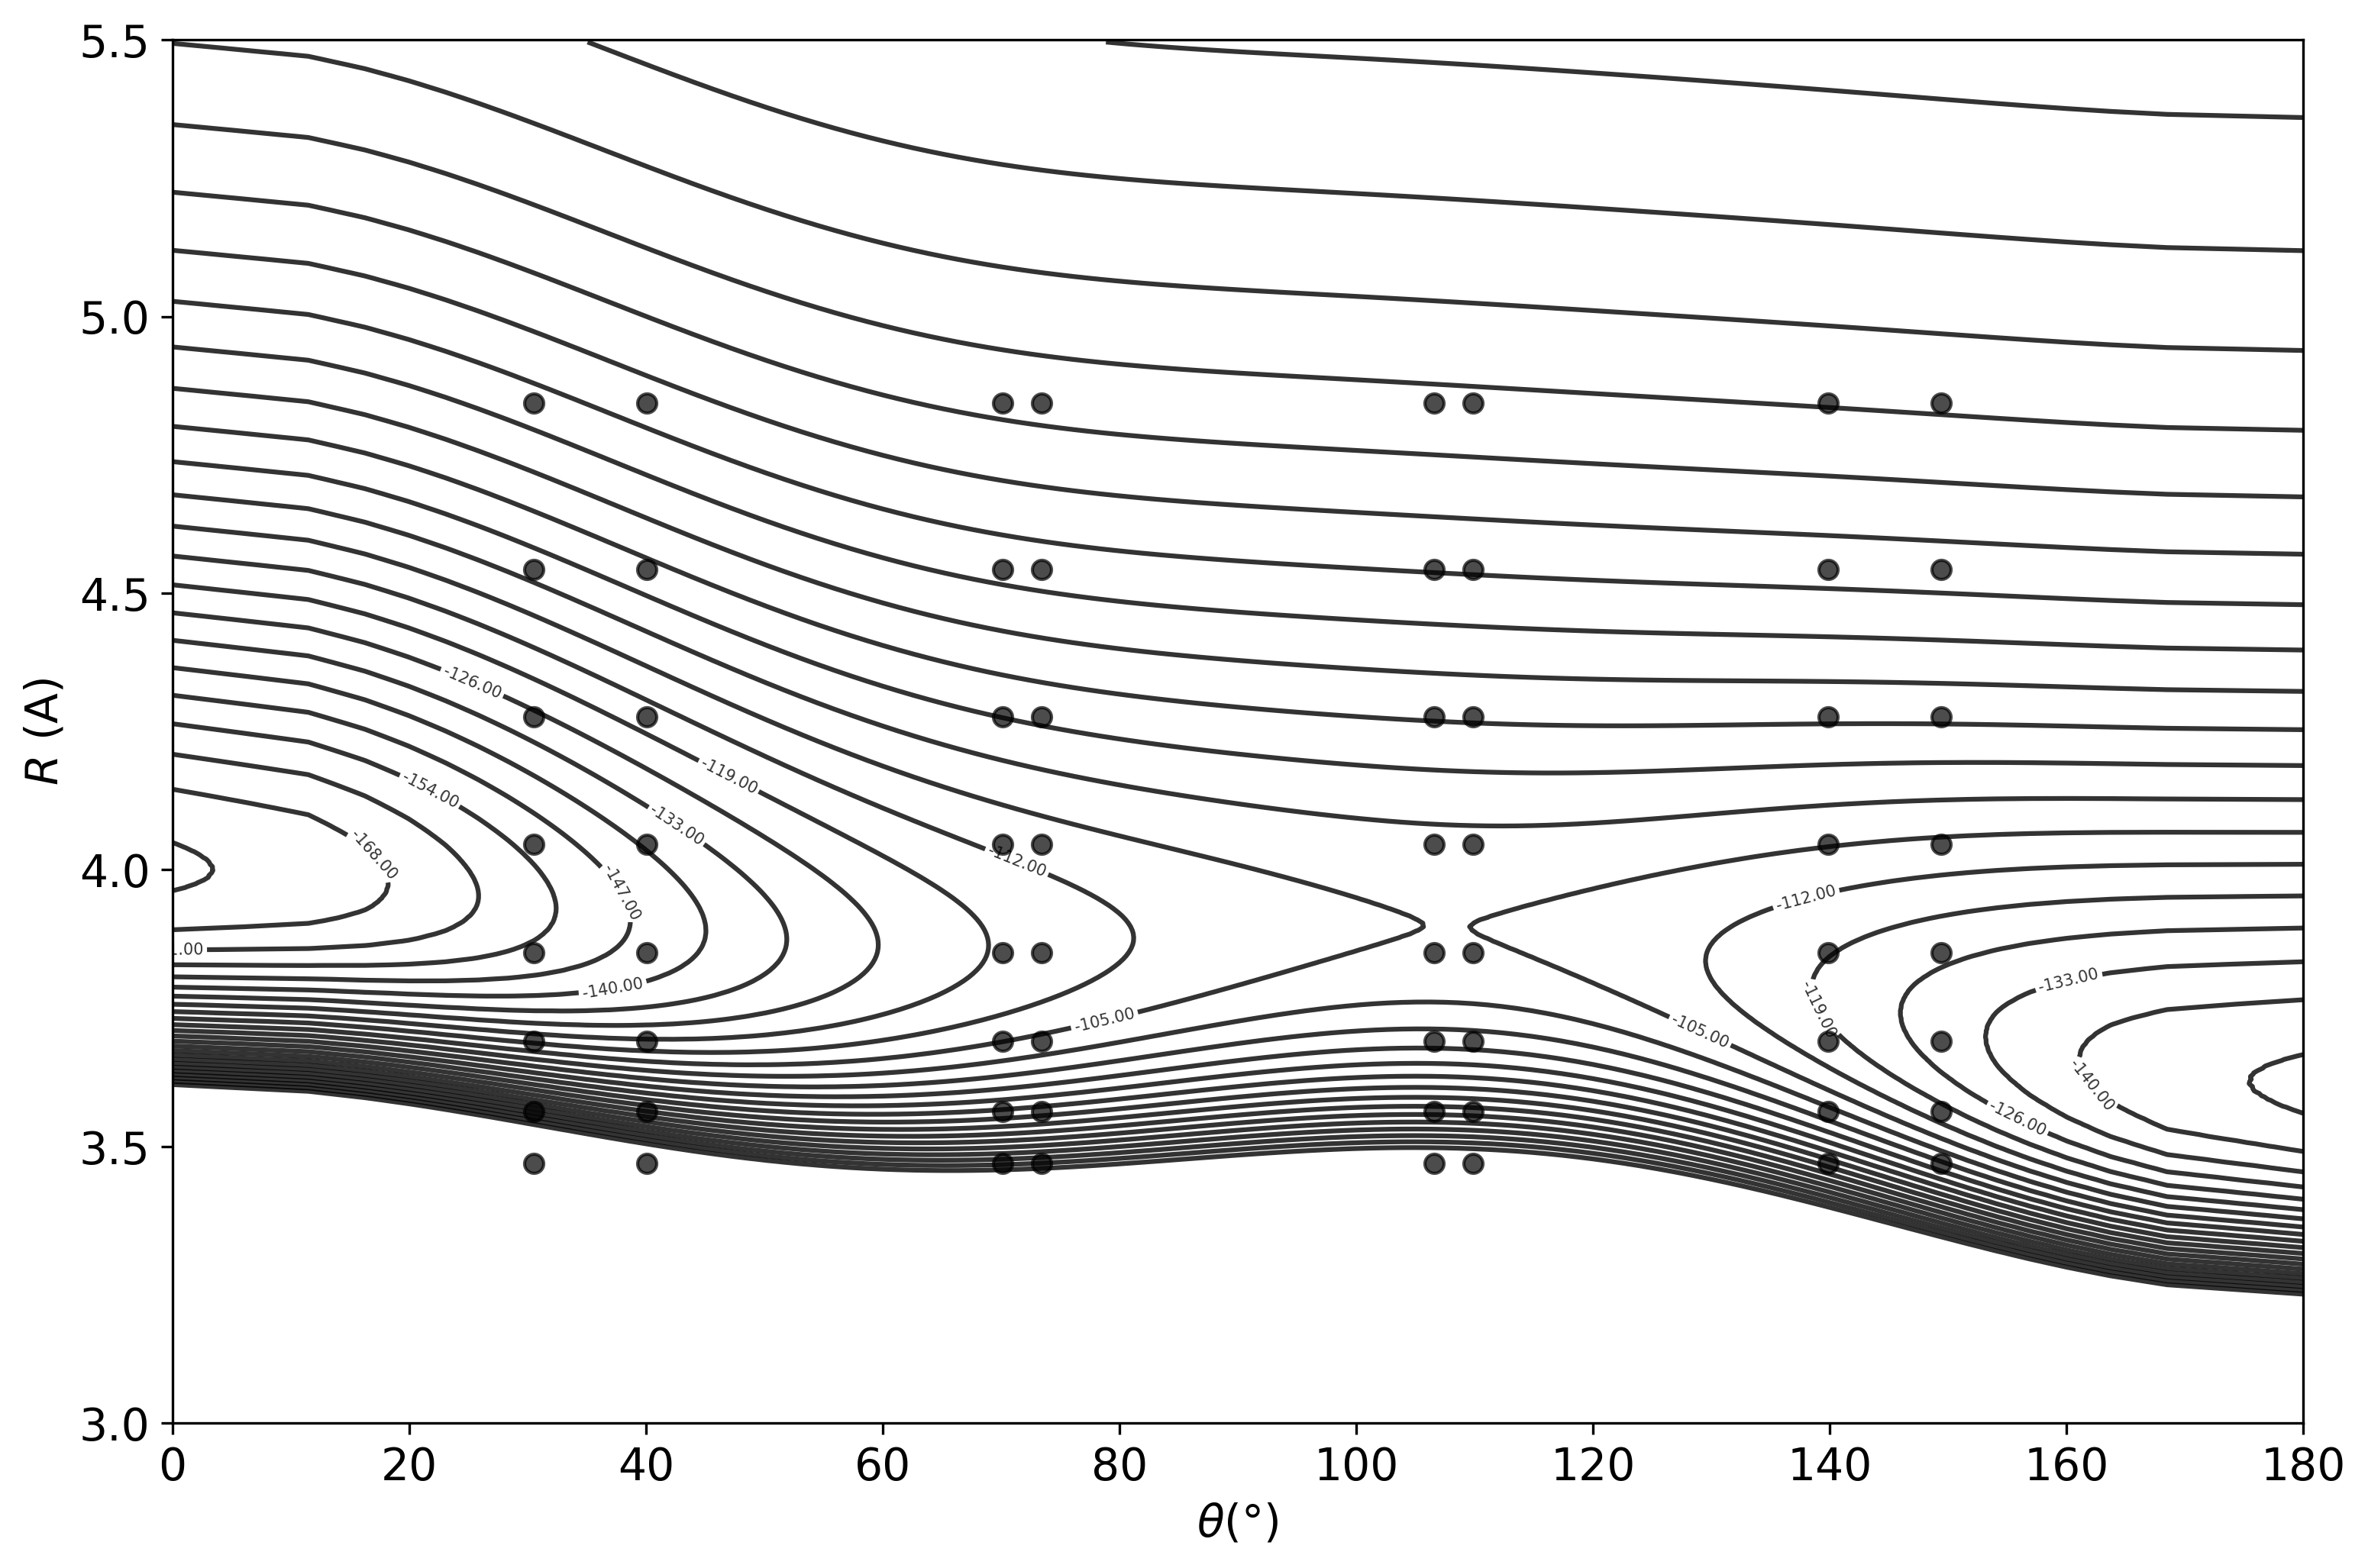

In [23]:
cmap = plt.get_cmap('tab10')
theta_p, r_p, v_p = theta[v < 0], r[v < 0], v[v < 0]
coef = 180 / np.pi

p = plt.tricontour(theta_p[r_p < 5.5] * coef, r_p[r_p < 5.5], v_p[r_p < 5.5], levels=np.linspace(-175, 0, 26), colors='black', linestyles='solid', alpha=0.8)
# plt.plot(theta[ind_min1], r[ind_min1], 'x', c='black')
# plt.plot(theta[ind_min2], r[ind_min2], 'x', c='black')
# plt.plot(1.8754889808102941, 3.897, 'o', c='black')
Vs_K = []
for K in range(K_max + 1):
    Rs_grid, Xs_grid = np.meshgrid(Rs_DVR * arhcl_params['S'] * au_to_angs, Xs_K[K])
    Rs_grid, Xs_grid = Rs_grid.flatten(), Xs_grid.flatten()
    Vs = pot2d(Rs_grid, Xs_grid)
    Vs_K.append(Vs)
Vs_K = np.array(Vs_K)

labels = p.levels[:-15:]
plt.clabel(p, inline=1, fontsize=5, levels=labels, fmt='%.2f', use_clabeltext=True)
plt.ylim()
plt.xlabel('$\\theta (\degree)$')
plt.ylabel('$R$ (A)')
plt.ylim((3, 5.5))
# plt.xlim((0, np.pi))

# offset = 0.05
# plt.bar(np.arccos(Xs_K[0]), eigvecs5.T[0][::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 1 * offset, eigvecs5.T[0][1::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 2 * offset, eigvecs5.T[0][2::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 3 * offset, eigvecs5.T[0][3::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.bar(np.arccos(Xs_K[0]) + 4 * offset, eigvecs5.T[0][4::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.axhline(4.0, linestyle='dashed', c='black', linewidth=0.2)

for K in range(K_max + 1):
    for i in range(N_theta):
        evec = eigvecs.T[0][i * N_R_lim:(i+1) * N_R_lim]
        epos = np.where(evec >=0, evec, 0)
        eneg = np.where(evec <0, -evec, 0)
        plt.scatter(np.repeat(np.arccos(Xs_K[K][i]) * coef, N_R_lim), Rs_DVR * arhcl_params['S'] * au_to_angs, marker='o', c='black', zorder=20, alpha=0.7)
        # plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * arhcl_params['S'] * au_to_angs, marker='o', facecolors='black', edgecolors='black', s=epos * 400, zorder=20, alpha=0.7)
        # plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * arhcl_params['S'] * au_to_angs, facecolors='none', edgecolors='black', s=eneg * 400, alpha=0.7, zorder=20)

In [26]:
h_dvr_pauli0 = pauli_decompose(h_dvr0)
h_dvr_pauli1 = pauli_decompose(h_dvr1)

np.allclose(h_dvr0, h_dvr_pauli0.to_matrix())
np.allclose(h_dvr1, h_dvr_pauli1.to_matrix())

print(h_dvr0.shape)
print(h_dvr_pauli0.coeffs.shape)
print(h_dvr1.shape)
print(h_dvr_pauli1.coeffs.shape)
# print(h_dvr_pauli)

/Users/user/Library/CloudStorage/OneDrive-UBC/arc/root/project/dvr_vqe/2d/dvr2d.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  coefs[i] = np.trace(np.dot(p.to_matrix(), h)) / 2**num_qubits


(64, 64)
(353,)
(64, 64)
(472,)
